# 📈 Tutorial Lengkap Day Trading Saham dengan Visualisasi

## Panduan Komprehensif Belajar Day Trading dari Nol

Notebook ini berisi tutorial lengkap day trading saham dengan:
- ✅ Penjelasan konsep mendalam
- ✅ Visualisasi interaktif
- ✅ Implementasi indikator teknikal
- ✅ Contoh strategi trading
- ✅ Backtesting
- ✅ Risk management
- ✅ Performance analysis

**Author:** Day Trading Tutorial  
**Date:** January 2026  
**Level:** Pemula hingga Intermediate

---

## Daftar Isi

1. [Import Libraries & Setup](#1)
2. [Pengenalan Day Trading](#2)
3. [Data Collection - Market Data](#3)
4. [Candlestick Charts](#4)
5. [Moving Averages (MA)](#5)
6. [Relative Strength Index (RSI)](#6)
7. [MACD Indicator](#7)
8. [Bollinger Bands](#8)
9. [Volume Analysis](#9)
10. [Support & Resistance](#10)
11. [Chart Patterns](#11)
12. [Trading Strategy](#12)
13. [Backtesting](#13)
14. [Risk Management](#14)
15. [Performance Analysis](#15)

<a id="1"></a>
## 1. Import Libraries & Setup

Pertama kita import semua library yang diperlukan untuk analisis teknikal dan visualisasi.

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Data fetching
import yfinance as yf

# Visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import mplfinance as mpf

# Technical indicators
from scipy.signal import find_peaks
import warnings
warnings.filterwarnings('ignore')

# Configuration
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Display settings
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)

print("✅ All libraries imported successfully!")
print(f"📊 Pandas version: {pd.__version__}")
print(f"📈 NumPy version: {np.__version__}")
print(f"📉 yfinance installed and ready")

✅ All libraries imported successfully!
📊 Pandas version: 2.2.3
📈 NumPy version: 2.2.6
📉 yfinance installed and ready


<a id="2"></a>
## 2. Pengenalan Day Trading

### Apa itu Day Trading?

**Day Trading** adalah strategi trading di mana trader membeli dan menjual instrumen keuangan (saham) dalam hari yang sama. Posisi tidak dibawa overnight (menginap).

### Karakteristik Day Trader:
- ⏰ **Holding Period:** Beberapa menit hingga beberapa jam
- 🎯 **Target Profit:** 1-5% per trade
- 📊 **Analisis:** Fokus pada analisis teknikal
- 💰 **Frekuensi:** Multiple trades per hari
- ⚡ **Kecepatan:** Keputusan cepat dan eksekusi

### Perbedaan dengan Investasi Jangka Panjang

| Aspek | Day Trading | Long-term Investment |
|-------|-------------|---------------------|
| **Durasi** | < 1 hari | Bulan/Tahun |
| **Analisis** | Teknikal | Fundamental |
| **Risk** | Tinggi | Sedang-Rendah |
| **Time Commitment** | Full-time | Part-time |
| **Biaya Transaksi** | Tinggi | Rendah |

### Modal yang Dibutuhkan

Untuk day trading yang efektif, minimal modal **Rp 10-50 juta** dengan pertimbangan:
- Diversifikasi posisi
- Risk management yang proper
- Buffer untuk drawdown
- Biaya transaksi yang tinggi

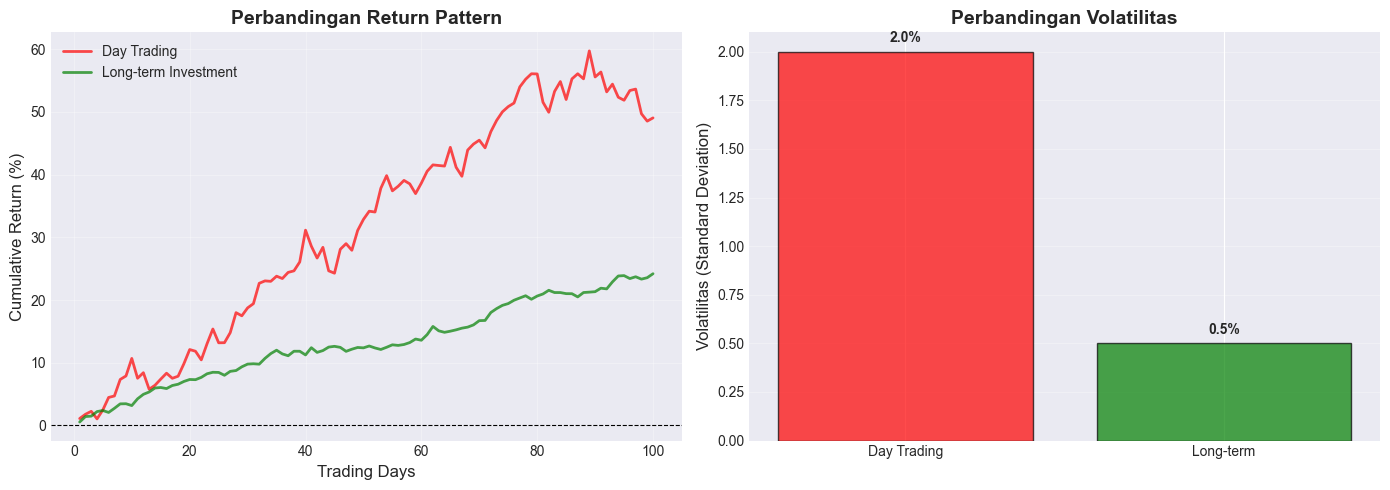

📊 Day Trading: High volatility, high frequency, short-term
📈 Long-term: Low volatility, low frequency, fundamental-based


In [2]:
# Visualisasi perbandingan Day Trading vs Long-term Investment
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Simulasi Return Pattern
days = np.arange(1, 101)
day_trading_returns = np.random.normal(0.5, 2, 100)
day_trading_cumulative = np.cumsum(day_trading_returns)

long_term_returns = np.random.normal(0.3, 0.5, 100)
long_term_cumulative = np.cumsum(long_term_returns)

# Plot 1: Cumulative Returns
axes[0].plot(days, day_trading_cumulative, label='Day Trading', linewidth=2, color='red', alpha=0.7)
axes[0].plot(days, long_term_cumulative, label='Long-term Investment', linewidth=2, color='green', alpha=0.7)
axes[0].set_xlabel('Trading Days', fontsize=12)
axes[0].set_ylabel('Cumulative Return (%)', fontsize=12)
axes[0].set_title('Perbandingan Return Pattern', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=0, color='black', linestyle='--', linewidth=0.8)

# Plot 2: Volatility Comparison
strategies = ['Day Trading', 'Long-term']
volatility = [2.0, 0.5]
colors = ['red', 'green']

axes[1].bar(strategies, volatility, color=colors, alpha=0.7, edgecolor='black')
axes[1].set_ylabel('Volatilitas (Standard Deviation)', fontsize=12)
axes[1].set_title('Perbandingan Volatilitas', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

for i, v in enumerate(volatility):
    axes[1].text(i, v + 0.05, f'{v}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("📊 Day Trading: High volatility, high frequency, short-term")
print("📈 Long-term: Low volatility, low frequency, fundamental-based")

<a id="3"></a>
## 3. Data Collection - Market Data

Untuk belajar dan praktek, kita akan menggunakan data saham dari Yahoo Finance. Kita akan mengambil data saham global untuk simulasi karena API mudah diakses.

### Format Data OHLCV:
- **O**pen: Harga pembukaan
- **H**igh: Harga tertinggi
- **L**ow: Harga terendah
- **C**lose: Harga penutupan
- **V**olume: Volume transaksi

In [3]:
# Download historical data
# Untuk Indonesia bisa gunakan ticker .JK (contoh: BBCA.JK untuk BCA)
# Untuk tutorial ini kita gunakan AAPL (Apple) karena data lengkap dan likuid

ticker = 'AAPL'
start_date = '2023-01-01'
end_date = '2024-12-31'

print(f"📥 Downloading data for {ticker}...")
print(f"📅 Period: {start_date} to {end_date}")

# Download data
df = yf.download(ticker, start=start_date, end=end_date, progress=False)

# Check if download was successful
if df is None or df.empty:
    print("❌ Error: Failed to download data. Please check your internet connection.")
    raise ValueError("Data download failed")

# Flatten multi-level columns if needed
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

print(f"\n✅ Data downloaded successfully!")
print(f"📊 Total trading days: {len(df)}")
print(f"\n📋 Data Preview:")
print(df.head(10))

print(f"\n📈 Basic Statistics:")
print(df.describe())

📥 Downloading data for AAPL...
📅 Period: 2023-01-01 to 2024-12-31

✅ Data downloaded successfully!
📊 Total trading days: 501

📋 Data Preview:
Price       Close   High    Low   Open     Volume
Date                                             
2023-01-03 123.21 128.95 122.32 128.34  112117500
2023-01-04 124.48 126.75 123.22 125.00   89113600
2023-01-05 123.16 125.87 122.91 125.24   80962700
2023-01-06 127.69 128.35 123.03 124.14   87754700
2023-01-09 128.22 131.43 127.96 128.53   70790800
2023-01-10 128.79 129.31 126.22 128.32   63896200
2023-01-11 131.51 131.53 128.52 129.30   69458900
2023-01-12 131.43 132.26 129.49 131.89   71379600
2023-01-13 132.76 132.91 129.70 130.07   57809700
2023-01-17 133.92 135.25 132.14 132.83   63646600

📈 Basic Statistics:
Price  Close   High    Low   Open       Volume
count 501.00 501.00 501.00 501.00       501.00
mean  188.12 189.61 186.36 187.85  58198232.93
std    28.01  28.15  27.76  27.99  25134923.40
min   123.16 125.87 122.32 124.14  23234700.00
25

<a id="4"></a>
## 4. Candlestick Charts

**Candlestick** adalah representasi visual dari pergerakan harga dalam satu periode waktu tertentu.

### Anatomi Candlestick:

```
    │  <- Upper Shadow (Wick)
  ┌─┴─┐
  │   │ <- Body (Open-Close)
  └─┬─┘
    │  <- Lower Shadow (Wick)
```

- **Body Hijau/Putih:** Close > Open (Bullish)
- **Body Merah/Hitam:** Close < Open (Bearish)
- **Upper Shadow:** Menunjukkan rejection di harga tinggi
- **Lower Shadow:** Menunjukkan rejection di harga rendah

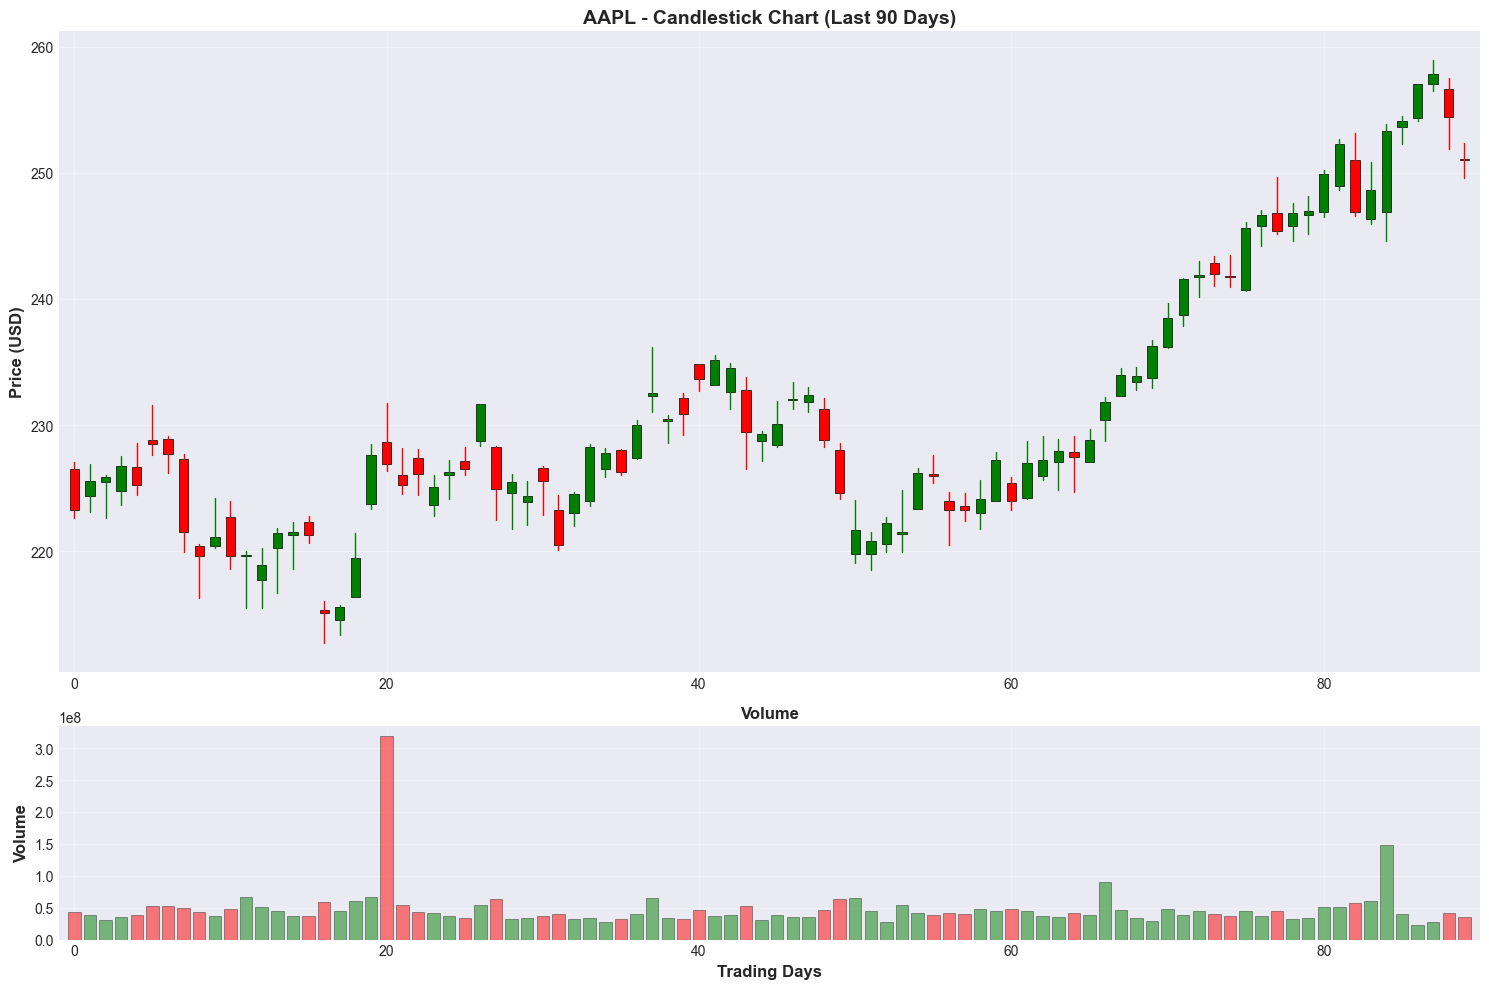

✅ Candlestick chart created!
🟢 Green candle = Bullish (Close > Open)
🔴 Red candle = Bearish (Close < Open)


In [4]:
# Visualisasi Candlestick Chart dengan mplfinance
# Ambil data 3 bulan terakhir untuk visualisasi yang lebih jelas
df_recent = df.tail(90).copy()

# Create candlestick chart
fig, axes = plt.subplots(2, 1, figsize=(15, 10), gridspec_kw={'height_ratios': [3, 1]})

# Plot candlestick
for idx in range(len(df_recent)):
    date = df_recent.index[idx]
    open_price = float(df_recent['Open'].iloc[idx])
    close_price = float(df_recent['Close'].iloc[idx])
    high_price = float(df_recent['High'].iloc[idx])
    low_price = float(df_recent['Low'].iloc[idx])
    
    # Color: green if close > open, red if close < open
    color = 'green' if close_price >= open_price else 'red'
    
    # Draw high-low line
    axes[0].plot([idx, idx], [low_price, high_price], color=color, linewidth=1)
    
    # Draw body
    body_height = abs(close_price - open_price)
    body_bottom = min(open_price, close_price)
    rect = Rectangle((idx-0.3, body_bottom), 0.6, body_height, 
                     facecolor=color, edgecolor='black', linewidth=0.5)
    axes[0].add_patch(rect)

axes[0].set_ylabel('Price (USD)', fontsize=12, fontweight='bold')
axes[0].set_title(f'{ticker} - Candlestick Chart (Last 90 Days)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim(-1, len(df_recent))

# Plot volume
price_changes = df_recent['Close'].values - df_recent['Open'].values
colors_volume = ['green' if pc >= 0 else 'red' for pc in price_changes]
axes[1].bar(range(len(df_recent)), df_recent['Volume'], color=colors_volume, alpha=0.5, edgecolor='black', linewidth=0.5)
axes[1].set_xlabel('Trading Days', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Volume', fontsize=12, fontweight='bold')
axes[1].set_title('Volume', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim(-1, len(df_recent))

plt.tight_layout()
plt.show()

print("✅ Candlestick chart created!")
print("🟢 Green candle = Bullish (Close > Open)")
print("🔴 Red candle = Bearish (Close < Open)")

### Candlestick Patterns Penting

Beberapa pattern candlestick yang sering digunakan dalam day trading:

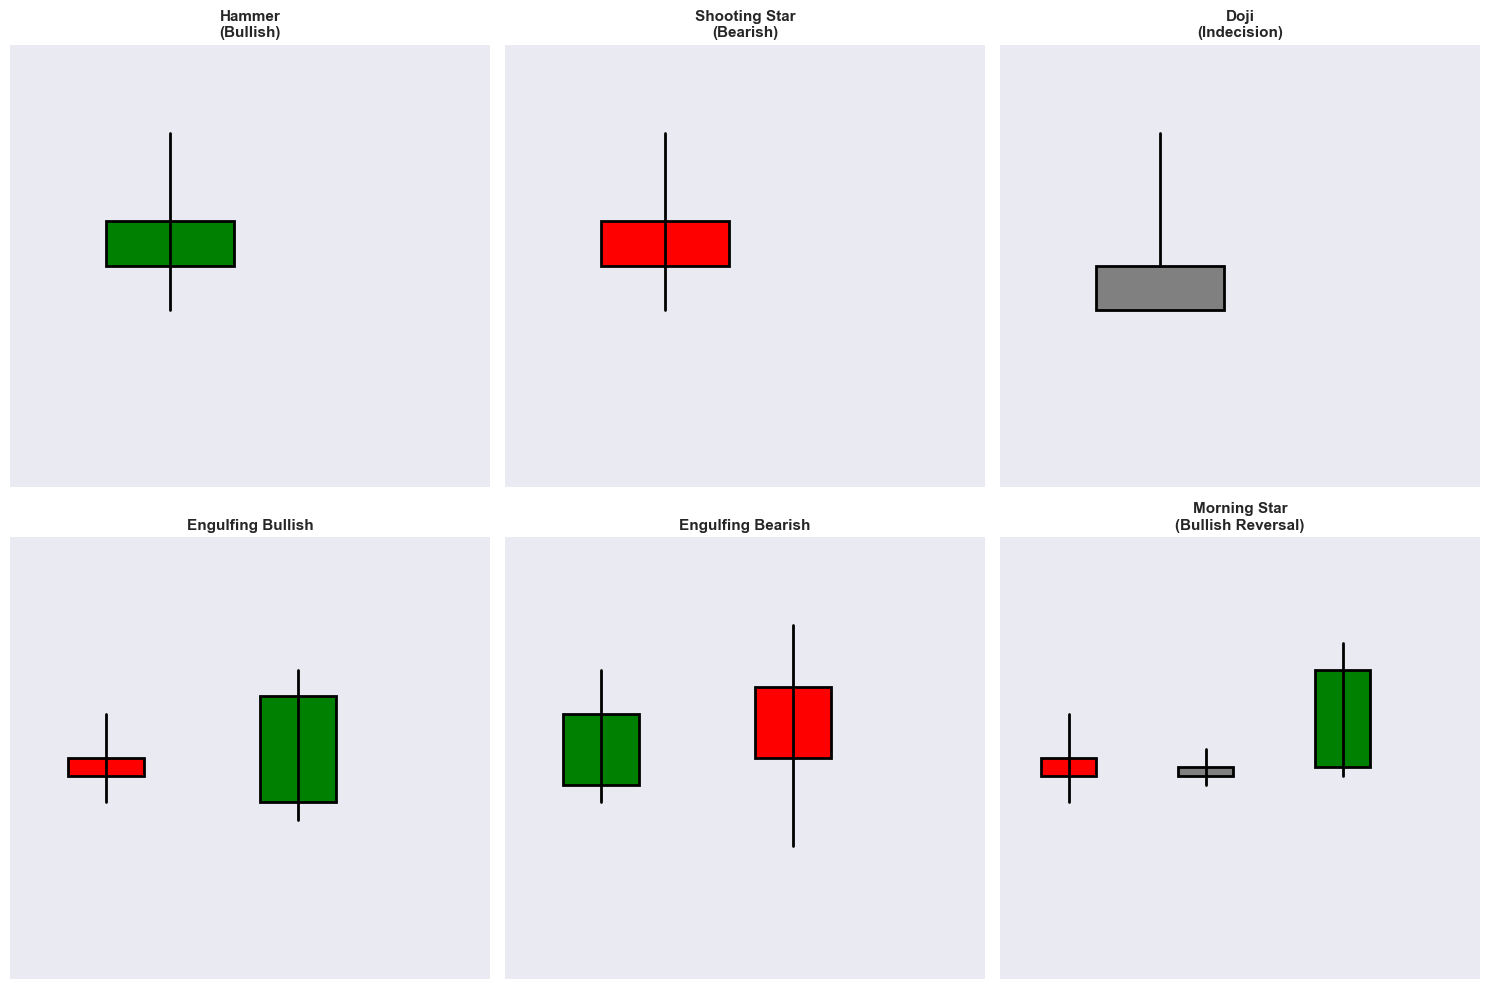

📊 Candlestick patterns adalah formasi yang memberikan sinyal potensial reversal atau continuation
✅ Pattern ini harus dikonfirmasi dengan indikator lain dan volume


In [5]:
# Ilustrasi Candlestick Patterns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

patterns = [
    ('Hammer\n(Bullish)', [(2, 4, 3, 2.5)], 'green'),
    ('Shooting Star\n(Bearish)', [(2, 4, 2.5, 3)], 'red'),
    ('Doji\n(Indecision)', [(2.5, 4, 2.5, 2)], 'gray'),
    ('Engulfing Bullish', [(2, 3, 2.5, 2.3), (1.8, 3.5, 3.2, 2)], ['red', 'green']),
    ('Engulfing Bearish', [(2, 3.5, 3, 2.2), (1.5, 4, 2.5, 3.3)], ['green', 'red']),
    ('Morning Star\n(Bullish Reversal)', [(2, 3, 2.5, 2.3), (2.2, 2.6, 2.4, 2.3), (2.3, 3.8, 3.5, 2.4)], 
     ['red', 'gray', 'green'])
]

for idx, (title, candles, colors) in enumerate(patterns):
    ax = axes[idx]
    
    if not isinstance(colors, list):
        colors = [colors]
    
    for i, (low, high, open_p, close_p) in enumerate(candles):
        color = colors[i] if i < len(colors) else colors[0]
        
        # Draw wick
        ax.plot([i, i], [low, high], color='black', linewidth=2)
        
        # Draw body
        body_height = abs(close_p - open_p)
        body_bottom = min(open_p, close_p)
        if body_height < 0.05:  # Doji
            ax.plot([i-0.2, i+0.2], [close_p, close_p], color='black', linewidth=2)
        else:
            rect = Rectangle((i-0.2, body_bottom), 0.4, body_height,
                           facecolor=color, edgecolor='black', linewidth=2)
            ax.add_patch(rect)
    
    ax.set_xlim(-0.5, len(candles))
    ax.set_ylim(0, 5)
    ax.set_title(title, fontsize=11, fontweight='bold')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

print("📊 Candlestick patterns adalah formasi yang memberikan sinyal potensial reversal atau continuation")
print("✅ Pattern ini harus dikonfirmasi dengan indikator lain dan volume")

<a id="5"></a>
## 5. Moving Averages (MA)

**Moving Average** adalah rata-rata harga dalam periode tertentu yang digunakan untuk:
- Mengidentifikasi trend
- Support/Resistance dinamis
- Sinyal entry/exit

### Jenis Moving Average:

**1. Simple Moving Average (SMA)**
$$SMA = \frac{P_1 + P_2 + ... + P_n}{n}$$

**2. Exponential Moving Average (EMA)**
$$EMA = Price_{today} \times k + EMA_{yesterday} \times (1-k)$$
$$k = \frac{2}{n+1}$$

### Popular Period:
- **MA20:** Short-term trend
- **MA50:** Medium-term trend  
- **MA200:** Long-term trend

In [6]:
# Calculate Moving Averages
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()

# Calculate EMA
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()

print("✅ Moving Averages calculated!")
print(f"\n📊 Latest MA Values:")
print(f"SMA 20:  ${df['SMA_20'].iloc[-1]:.2f}")
print(f"SMA 50:  ${df['SMA_50'].iloc[-1]:.2f}")
print(f"SMA 200: ${df['SMA_200'].iloc[-1]:.2f}")
print(f"EMA 12:  ${df['EMA_12'].iloc[-1]:.2f}")
print(f"EMA 26:  ${df['EMA_26'].iloc[-1]:.2f}")

✅ Moving Averages calculated!

📊 Latest MA Values:
SMA 20:  $248.15
SMA 50:  $236.15
SMA 200: $211.71
EMA 12:  $251.20
EMA 26:  $245.55


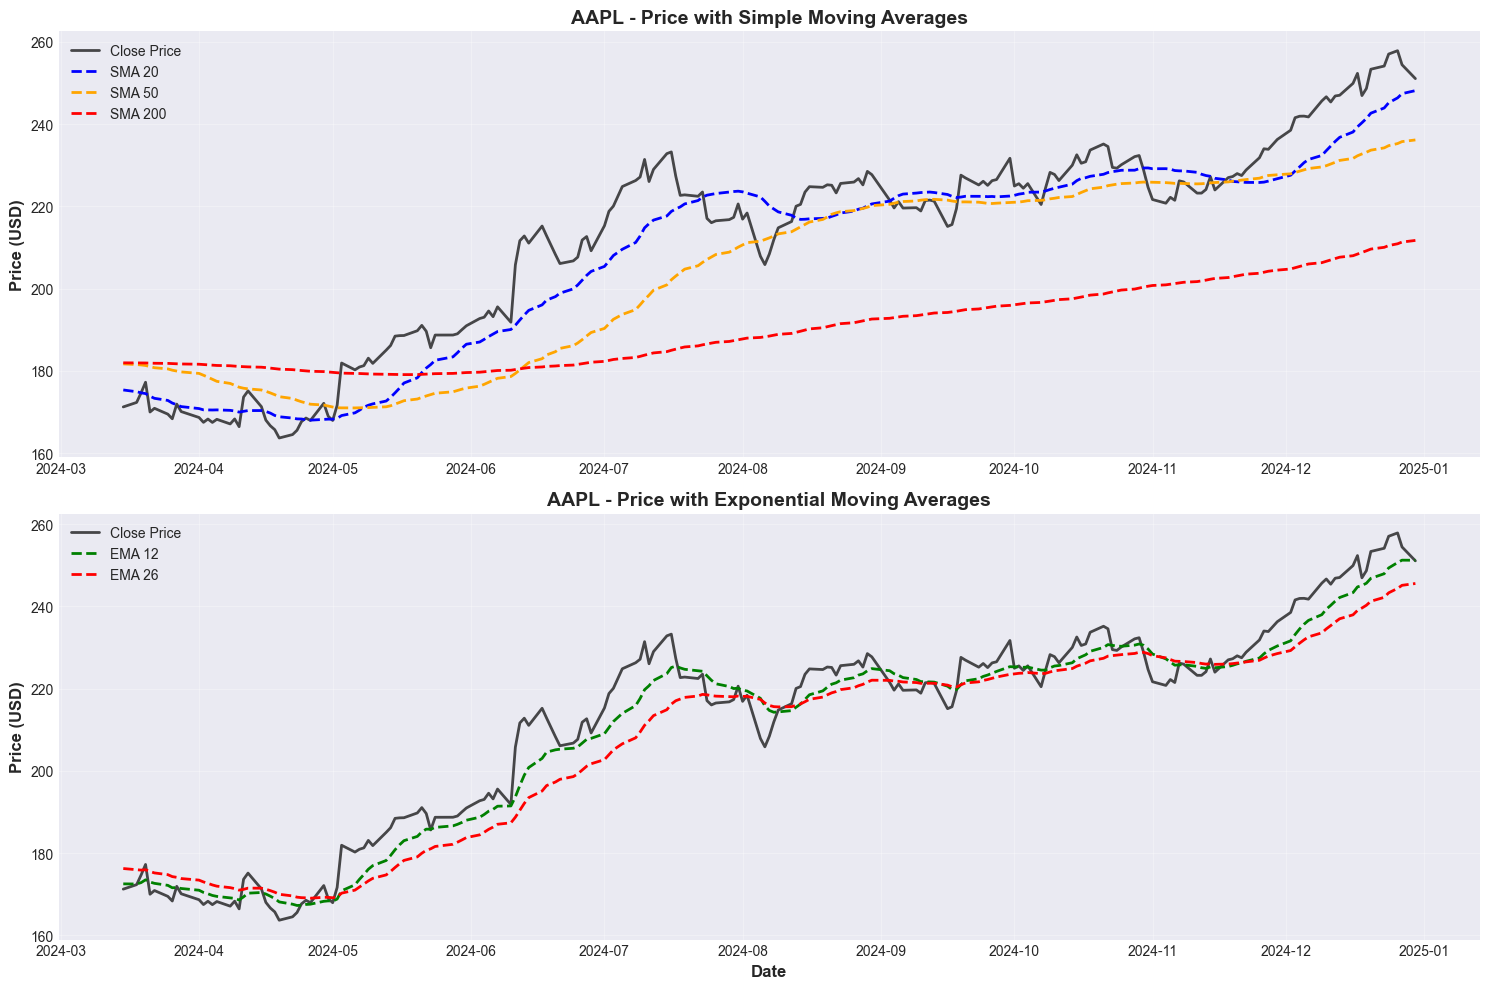

📈 Moving Average Interpretation:
✅ Price > MA = Uptrend (Bullish)
❌ Price < MA = Downtrend (Bearish)
🔄 MA Crossover = Potential trend change signal


In [7]:
# Visualisasi Moving Averages
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Plot 1: Price with SMA
df_plot = df.tail(200)
axes[0].plot(df_plot.index, df_plot['Close'], label='Close Price', linewidth=2, color='black', alpha=0.7)
axes[0].plot(df_plot.index, df_plot['SMA_20'], label='SMA 20', linewidth=2, color='blue', linestyle='--')
axes[0].plot(df_plot.index, df_plot['SMA_50'], label='SMA 50', linewidth=2, color='orange', linestyle='--')
axes[0].plot(df_plot.index, df_plot['SMA_200'], label='SMA 200', linewidth=2, color='red', linestyle='--')
axes[0].set_ylabel('Price (USD)', fontsize=12, fontweight='bold')
axes[0].set_title(f'{ticker} - Price with Simple Moving Averages', fontsize=14, fontweight='bold')
axes[0].legend(loc='best', fontsize=10)
axes[0].grid(True, alpha=0.3)

# Plot 2: Price with EMA
axes[1].plot(df_plot.index, df_plot['Close'], label='Close Price', linewidth=2, color='black', alpha=0.7)
axes[1].plot(df_plot.index, df_plot['EMA_12'], label='EMA 12', linewidth=2, color='green', linestyle='--')
axes[1].plot(df_plot.index, df_plot['EMA_26'], label='EMA 26', linewidth=2, color='red', linestyle='--')
axes[1].set_xlabel('Date', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Price (USD)', fontsize=12, fontweight='bold')
axes[1].set_title(f'{ticker} - Price with Exponential Moving Averages', fontsize=14, fontweight='bold')
axes[1].legend(loc='best', fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📈 Moving Average Interpretation:")
print("✅ Price > MA = Uptrend (Bullish)")
print("❌ Price < MA = Downtrend (Bearish)")
print("🔄 MA Crossover = Potential trend change signal")

<a id="6"></a>
## 6. Relative Strength Index (RSI)

**RSI** adalah momentum oscillator yang mengukur kecepatan dan perubahan pergerakan harga.

### Formula:
$$RSI = 100 - \frac{100}{1 + RS}$$

$$RS = \frac{Average \ Gain}{Average \ Loss}$$

### Interpretasi:
- **RSI > 70:** Overbought (potensi koreksi/jual)
- **RSI < 30:** Oversold (potensi rebound/beli)
- **RSI = 50:** Neutral
- **Divergence:** RSI vs Price = sinyal reversal

In [8]:
# Calculate RSI
def calculate_rsi(data, period=14):
    """Calculate Relative Strength Index"""
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI'] = calculate_rsi(df['Close'], period=14)

print("✅ RSI calculated!")
print(f"\n📊 Current RSI: {df['RSI'].iloc[-1]:.2f}")

if df['RSI'].iloc[-1] > 70:
    print("⚠️ OVERBOUGHT - Consider selling or wait for pullback")
elif df['RSI'].iloc[-1] < 30:
    print("⚠️ OVERSOLD - Consider buying opportunity")
else:
    print("✅ NEUTRAL - No extreme condition")

✅ RSI calculated!

📊 Current RSI: 58.38
✅ NEUTRAL - No extreme condition


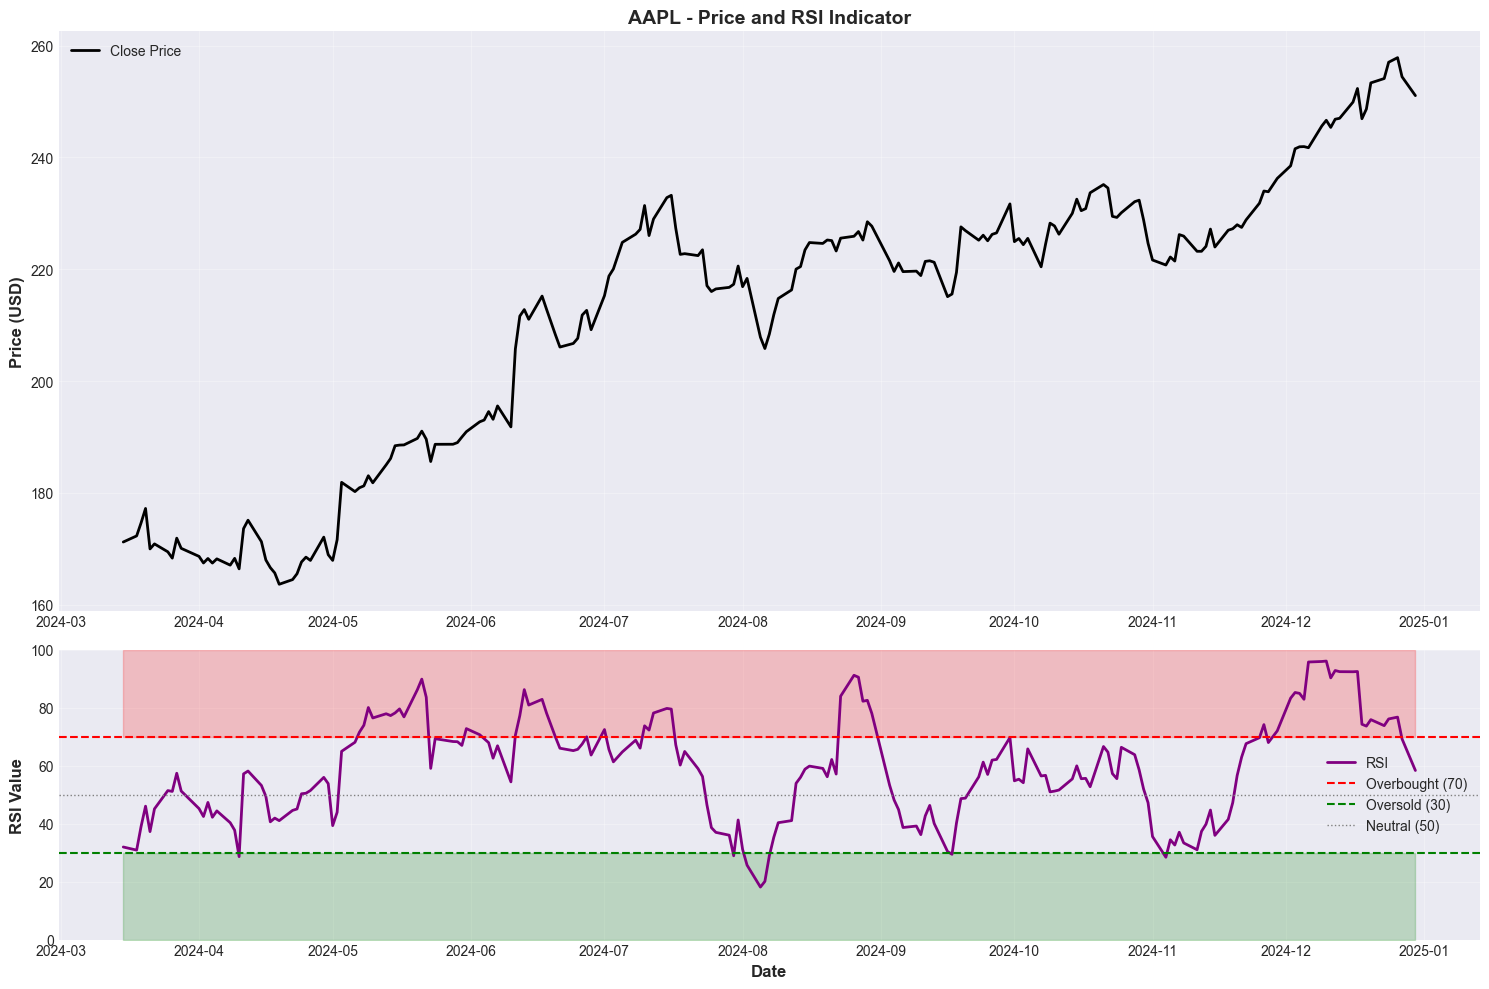


📊 RSI Statistics (Last 200 days):
Overbought periods (RSI > 70): 53 days (26.5%)
Oversold periods (RSI < 30): 8 days (4.0%)
Average RSI: 58.93


In [9]:
# Visualisasi RSI
fig, axes = plt.subplots(2, 1, figsize=(15, 10), gridspec_kw={'height_ratios': [2, 1]})

df_plot = df.tail(200)

# Plot 1: Price
axes[0].plot(df_plot.index, df_plot['Close'], linewidth=2, color='black', label='Close Price')
axes[0].set_ylabel('Price (USD)', fontsize=12, fontweight='bold')
axes[0].set_title(f'{ticker} - Price and RSI Indicator', fontsize=14, fontweight='bold')
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3)

# Plot 2: RSI
axes[1].plot(df_plot.index, df_plot['RSI'], linewidth=2, color='purple', label='RSI')
axes[1].axhline(y=70, color='red', linestyle='--', linewidth=1.5, label='Overbought (70)')
axes[1].axhline(y=30, color='green', linestyle='--', linewidth=1.5, label='Oversold (30)')
axes[1].axhline(y=50, color='gray', linestyle=':', linewidth=1, label='Neutral (50)')
axes[1].fill_between(df_plot.index, 70, 100, alpha=0.2, color='red')
axes[1].fill_between(df_plot.index, 0, 30, alpha=0.2, color='green')
axes[1].set_xlabel('Date', fontsize=12, fontweight='bold')
axes[1].set_ylabel('RSI Value', fontsize=12, fontweight='bold')
axes[1].set_ylim(0, 100)
axes[1].legend(loc='best')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistics
overbought_count = (df_plot['RSI'] > 70).sum()
oversold_count = (df_plot['RSI'] < 30).sum()

print(f"\n📊 RSI Statistics (Last 200 days):")
print(f"Overbought periods (RSI > 70): {overbought_count} days ({overbought_count/len(df_plot)*100:.1f}%)")
print(f"Oversold periods (RSI < 30): {oversold_count} days ({oversold_count/len(df_plot)*100:.1f}%)")
print(f"Average RSI: {df_plot['RSI'].mean():.2f}")

<a id="7"></a>
## 7. MACD (Moving Average Convergence Divergence)

**MACD** adalah indikator momentum yang menunjukkan hubungan antara dua moving average.

### Formula:
$$MACD \ Line = EMA_{12} - EMA_{26}$$
$$Signal \ Line = EMA_9 \ of \ MACD \ Line$$
$$Histogram = MACD \ Line - Signal \ Line$$

### Sinyal Trading:
- **MACD > Signal:** Bullish (Buy signal)
- **MACD < Signal:** Bearish (Sell signal)
- **Histogram mengembang:** Trend menguat
- **Histogram menyempit:** Trend melemah

In [10]:
# Calculate MACD
df['MACD'] = df['EMA_12'] - df['EMA_26']
df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
df['MACD_Histogram'] = df['MACD'] - df['MACD_Signal']

print("✅ MACD calculated!")
print(f"\n📊 Current MACD Values:")
print(f"MACD Line:     {df['MACD'].iloc[-1]:.2f}")
print(f"Signal Line:   {df['MACD_Signal'].iloc[-1]:.2f}")
print(f"Histogram:     {df['MACD_Histogram'].iloc[-1]:.2f}")

if df['MACD'].iloc[-1] > df['MACD_Signal'].iloc[-1]:
    print("\n✅ BULLISH - MACD above Signal (Buy signal)")
else:
    print("\n❌ BEARISH - MACD below Signal (Sell signal)")

✅ MACD calculated!

📊 Current MACD Values:
MACD Line:     5.65
Signal Line:   5.66
Histogram:     -0.01

❌ BEARISH - MACD below Signal (Sell signal)


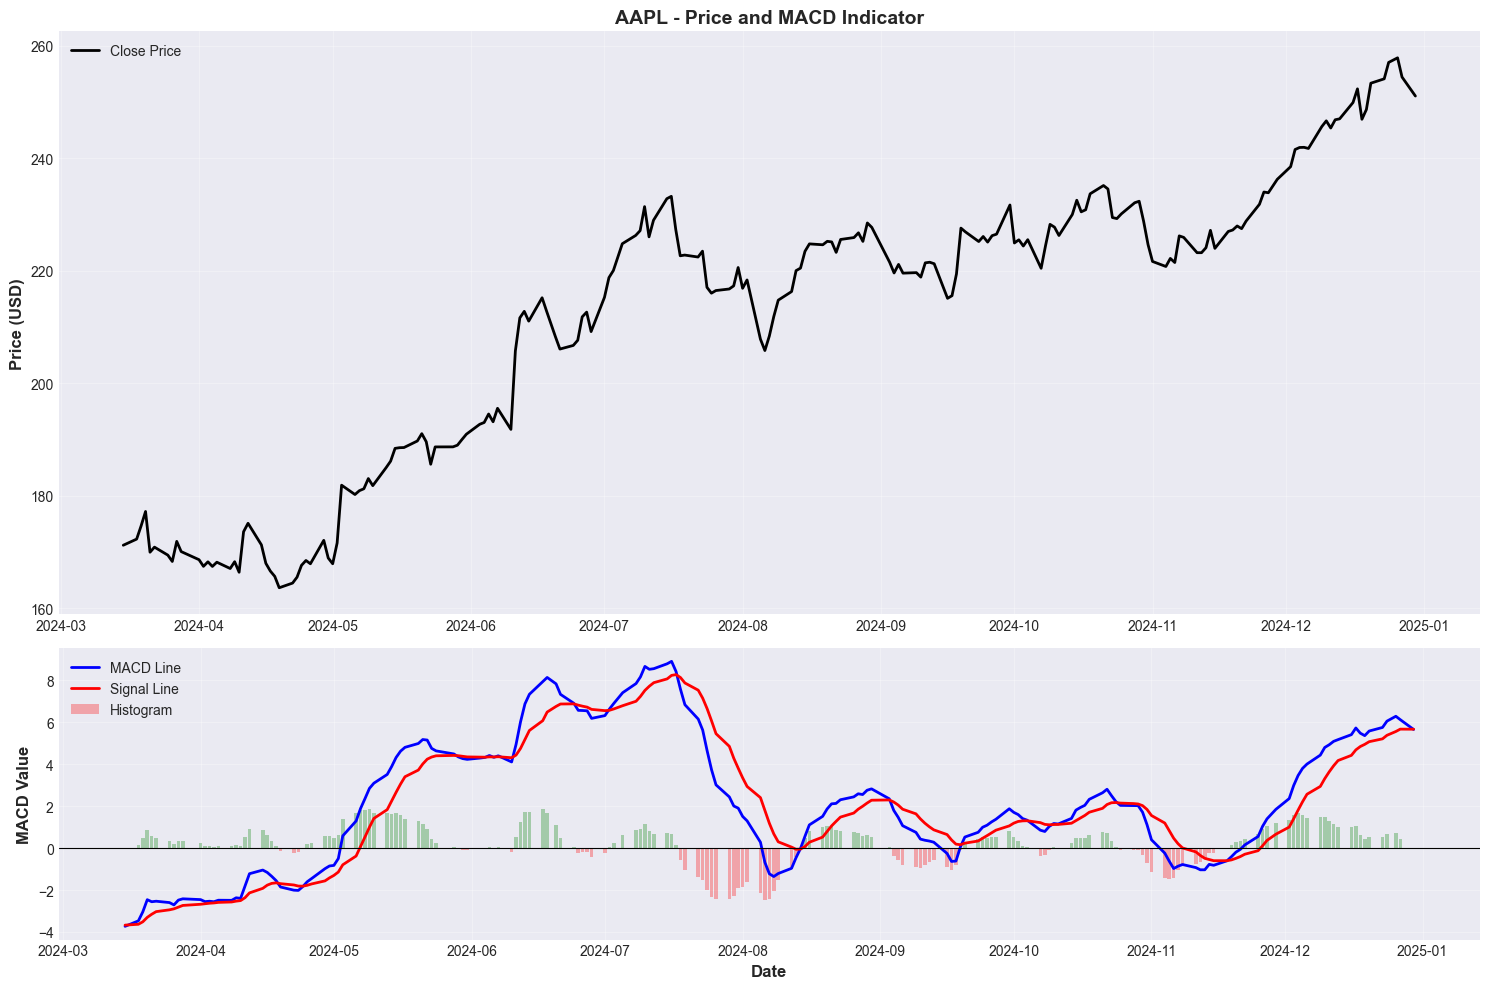


📊 MACD Crossovers (Last 200 days):
Bullish crossovers (MACD crosses above Signal): 10
Bearish crossovers (MACD crosses below Signal): 10


In [11]:
# Visualisasi MACD
fig, axes = plt.subplots(2, 1, figsize=(15, 10), gridspec_kw={'height_ratios': [2, 1]})

df_plot = df.tail(200)

# Plot 1: Price
axes[0].plot(df_plot.index, df_plot['Close'], linewidth=2, color='black', label='Close Price')
axes[0].set_ylabel('Price (USD)', fontsize=12, fontweight='bold')
axes[0].set_title(f'{ticker} - Price and MACD Indicator', fontsize=14, fontweight='bold')
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3)

# Plot 2: MACD
axes[1].plot(df_plot.index, df_plot['MACD'], linewidth=2, color='blue', label='MACD Line')
axes[1].plot(df_plot.index, df_plot['MACD_Signal'], linewidth=2, color='red', label='Signal Line')
axes[1].bar(df_plot.index, df_plot['MACD_Histogram'], 
           color=['green' if x > 0 else 'red' for x in df_plot['MACD_Histogram']],
           alpha=0.3, label='Histogram')
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
axes[1].set_xlabel('Date', fontsize=12, fontweight='bold')
axes[1].set_ylabel('MACD Value', fontsize=12, fontweight='bold')
axes[1].legend(loc='best')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find crossovers
df_plot['MACD_Cross'] = np.where(
    (df_plot['MACD'] > df_plot['MACD_Signal']) & 
    (df_plot['MACD'].shift(1) <= df_plot['MACD_Signal'].shift(1)), 
    1, 0)  # Bullish cross
df_plot['MACD_Cross'] = np.where(
    (df_plot['MACD'] < df_plot['MACD_Signal']) & 
    (df_plot['MACD'].shift(1) >= df_plot['MACD_Signal'].shift(1)), 
    -1, df_plot['MACD_Cross'])  # Bearish cross

bullish_crosses = (df_plot['MACD_Cross'] == 1).sum()
bearish_crosses = (df_plot['MACD_Cross'] == -1).sum()

print(f"\n📊 MACD Crossovers (Last 200 days):")
print(f"Bullish crossovers (MACD crosses above Signal): {bullish_crosses}")
print(f"Bearish crossovers (MACD crosses below Signal): {bearish_crosses}")

<a id="8"></a>
## 8. Bollinger Bands

**Bollinger Bands** mengukur volatilitas pasar dan memberikan level support/resistance dinamis.

### Formula:
$$Middle \ Band = SMA_{20}$$
$$Upper \ Band = SMA_{20} + (2 \times \sigma)$$
$$Lower \ Band = SMA_{20} - (2 \times \sigma)$$

### Interpretasi:
- **Price mendekati Upper Band:** Overbought
- **Price mendekati Lower Band:** Oversold
- **Bands menyempit (Squeeze):** Volatilitas rendah → Breakout imminent
- **Bands melebar:** Volatilitas tinggi → Strong trend

In [12]:
# Calculate Bollinger Bands
df['BB_Middle'] = df['Close'].rolling(window=20).mean()
df['BB_Std'] = df['Close'].rolling(window=20).std()
df['BB_Upper'] = df['BB_Middle'] + (2 * df['BB_Std'])
df['BB_Lower'] = df['BB_Middle'] - (2 * df['BB_Std'])
df['BB_Width'] = df['BB_Upper'] - df['BB_Lower']

print("✅ Bollinger Bands calculated!")
print(f"\n📊 Current Bollinger Bands:")
print(f"Upper Band:  ${df['BB_Upper'].iloc[-1]:.2f}")
print(f"Middle Band: ${df['BB_Middle'].iloc[-1]:.2f}")
print(f"Lower Band:  ${df['BB_Lower'].iloc[-1]:.2f}")
print(f"Current Price: ${df['Close'].iloc[-1]:.2f}")
print(f"Band Width:  ${df['BB_Width'].iloc[-1]:.2f}")

# Position within bands
position = (df['Close'].iloc[-1] - df['BB_Lower'].iloc[-1]) / (df['BB_Upper'].iloc[-1] - df['BB_Lower'].iloc[-1])
print(f"\nPrice position within bands: {position*100:.1f}%")
if position > 0.8:
    print("⚠️ Near upper band - Potentially overbought")
elif position < 0.2:
    print("⚠️ Near lower band - Potentially oversold")
else:
    print("✅ Within normal range")

✅ Bollinger Bands calculated!

📊 Current Bollinger Bands:
Upper Band:  $259.20
Middle Band: $248.15
Lower Band:  $237.09
Current Price: $251.06
Band Width:  $22.10

Price position within bands: 63.2%
✅ Within normal range


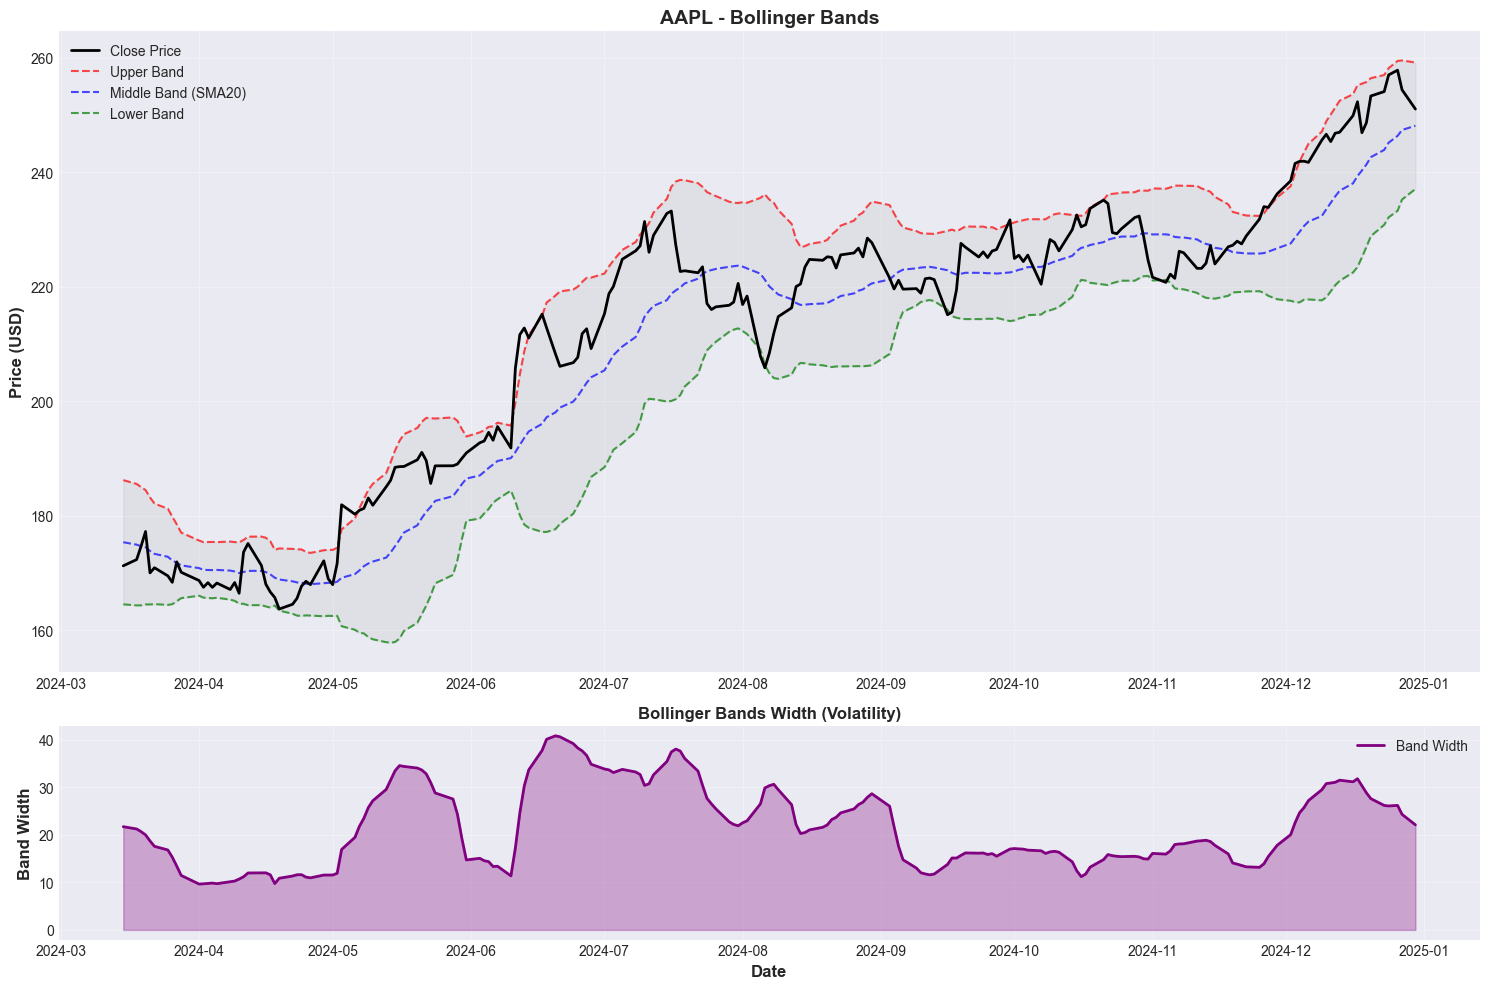


📊 Bollinger Bands Statistics (Last 200 days):
Times price touched/exceeded upper band: 72
Times price touched/fell below lower band: 30
Average band width: $21.49
Current band width vs average: 102.9%


In [13]:
# Visualisasi Bollinger Bands
fig, axes = plt.subplots(2, 1, figsize=(15, 10), gridspec_kw={'height_ratios': [3, 1]})

df_plot = df.tail(200)

# Plot 1: Price with Bollinger Bands
axes[0].plot(df_plot.index, df_plot['Close'], linewidth=2, color='black', label='Close Price', zorder=3)
axes[0].plot(df_plot.index, df_plot['BB_Upper'], linewidth=1.5, color='red', 
            linestyle='--', label='Upper Band', alpha=0.7)
axes[0].plot(df_plot.index, df_plot['BB_Middle'], linewidth=1.5, color='blue', 
            linestyle='--', label='Middle Band (SMA20)', alpha=0.7)
axes[0].plot(df_plot.index, df_plot['BB_Lower'], linewidth=1.5, color='green', 
            linestyle='--', label='Lower Band', alpha=0.7)
axes[0].fill_between(df_plot.index, df_plot['BB_Upper'], df_plot['BB_Lower'], 
                     alpha=0.1, color='gray')
axes[0].set_ylabel('Price (USD)', fontsize=12, fontweight='bold')
axes[0].set_title(f'{ticker} - Bollinger Bands', fontsize=14, fontweight='bold')
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3)

# Plot 2: Band Width
axes[1].plot(df_plot.index, df_plot['BB_Width'], linewidth=2, color='purple', label='Band Width')
axes[1].fill_between(df_plot.index, df_plot['BB_Width'], alpha=0.3, color='purple')
axes[1].set_xlabel('Date', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Band Width', fontsize=12, fontweight='bold')
axes[1].set_title('Bollinger Bands Width (Volatility)', fontsize=12, fontweight='bold')
axes[1].legend(loc='best')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistics
touches_upper = (df_plot['Close'] >= df_plot['BB_Upper'] * 0.98).sum()
touches_lower = (df_plot['Close'] <= df_plot['BB_Lower'] * 1.02).sum()

print(f"\n📊 Bollinger Bands Statistics (Last 200 days):")
print(f"Times price touched/exceeded upper band: {touches_upper}")
print(f"Times price touched/fell below lower band: {touches_lower}")
print(f"Average band width: ${df_plot['BB_Width'].mean():.2f}")
print(f"Current band width vs average: {df_plot['BB_Width'].iloc[-1] / df_plot['BB_Width'].mean() * 100:.1f}%")

<a id="9"></a>
## 9. Volume Analysis

**Volume** adalah jumlah saham yang diperdagangkan. Volume penting untuk:
- Mengkonfirmasi trend
- Mengidentifikasi breakout yang valid
- Mendeteksi accumulation/distribution

### Prinsip Volume:
- **High Volume + Price Increase = Strong Bullish**
- **High Volume + Price Decrease = Strong Bearish**
- **Low Volume = Weak momentum**
- **Volume Spike = Perhatian khusus**

In [14]:
# Volume Analysis
df['Volume_MA'] = df['Volume'].rolling(window=20).mean()
df['Volume_Ratio'] = df['Volume'] / df['Volume_MA']
df['Price_Change'] = df['Close'].pct_change() * 100

print("✅ Volume metrics calculated!")
print(f"\n📊 Current Volume Analysis:")
print(f"Current Volume: {df['Volume'].iloc[-1]:,.0f}")
print(f"20-day Avg Volume: {df['Volume_MA'].iloc[-1]:,.0f}")
print(f"Volume Ratio (Current/Avg): {df['Volume_Ratio'].iloc[-1]:.2f}x")
print(f"Price Change: {df['Price_Change'].iloc[-1]:.2f}%")

if df['Volume_Ratio'].iloc[-1] > 1.5:
    print("\n⚡ HIGH VOLUME - Above average trading activity")
elif df['Volume_Ratio'].iloc[-1] < 0.5:
    print("\n📉 LOW VOLUME - Below average trading activity")
else:
    print("\n✅ NORMAL VOLUME - Average trading activity")

✅ Volume metrics calculated!

📊 Current Volume Analysis:
Current Volume: 35,557,500
20-day Avg Volume: 46,921,770
Volume Ratio (Current/Avg): 0.76x
Price Change: -1.33%

✅ NORMAL VOLUME - Average trading activity


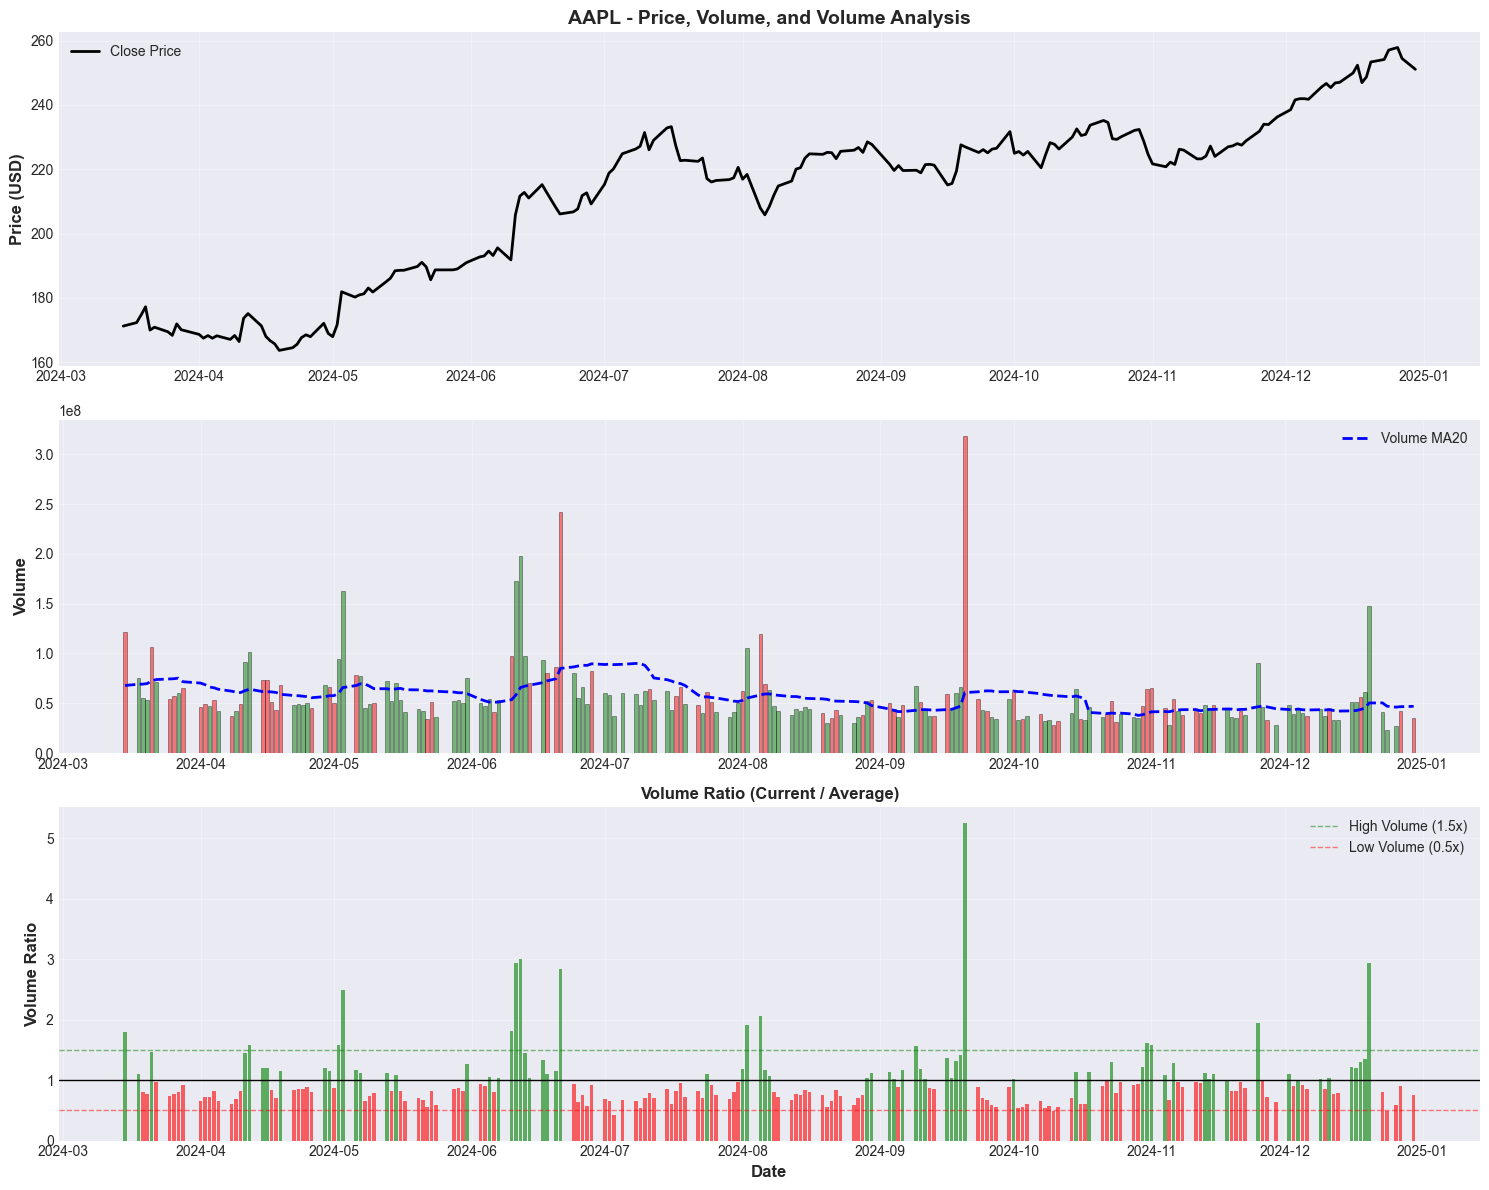


📊 Volume Spikes (>2x average): 7 occurrences

Most recent volume spikes:
Price       Close     Volume  Volume_Ratio  Price_Change
Date                                                    
2024-06-12 211.63  198134300          3.01          2.86
2024-06-21 206.09  241805100          2.84         -1.04
2024-08-05 207.86  119548600          2.05         -4.82
2024-09-20 226.92  318679900          5.25         -0.29
2024-12-20 253.34  147495300          2.93          1.88


In [15]:
# Visualisasi Volume Analysis
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

df_plot = df.tail(200)

# Plot 1: Price
axes[0].plot(df_plot.index, df_plot['Close'], linewidth=2, color='black', label='Close Price')
axes[0].set_ylabel('Price (USD)', fontsize=12, fontweight='bold')
axes[0].set_title(f'{ticker} - Price, Volume, and Volume Analysis', fontsize=14, fontweight='bold')
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3)

# Plot 2: Volume with coloring based on price movement
colors = ['green' if df_plot['Price_Change'].iloc[i] > 0 else 'red' for i in range(len(df_plot))]
axes[1].bar(df_plot.index, df_plot['Volume'], color=colors, alpha=0.5, edgecolor='black', linewidth=0.5)
axes[1].plot(df_plot.index, df_plot['Volume_MA'], linewidth=2, color='blue', label='Volume MA20', linestyle='--')
axes[1].set_ylabel('Volume', fontsize=12, fontweight='bold')
axes[1].legend(loc='best')
axes[1].grid(True, alpha=0.3)

# Plot 3: Volume Ratio (Volume Oscillator)
axes[2].bar(df_plot.index, df_plot['Volume_Ratio'], 
           color=['green' if x > 1 else 'red' for x in df_plot['Volume_Ratio']],
           alpha=0.6)
axes[2].axhline(y=1, color='black', linestyle='-', linewidth=1)
axes[2].axhline(y=1.5, color='green', linestyle='--', linewidth=1, alpha=0.5, label='High Volume (1.5x)')
axes[2].axhline(y=0.5, color='red', linestyle='--', linewidth=1, alpha=0.5, label='Low Volume (0.5x)')
axes[2].set_xlabel('Date', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Volume Ratio', fontsize=12, fontweight='bold')
axes[2].set_title('Volume Ratio (Current / Average)', fontsize=12, fontweight='bold')
axes[2].legend(loc='best')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Volume spike analysis
volume_spikes = df_plot[df_plot['Volume_Ratio'] > 2.0]
print(f"\n📊 Volume Spikes (>2x average): {len(volume_spikes)} occurrences")
if len(volume_spikes) > 0:
    print("\nMost recent volume spikes:")
    print(volume_spikes[['Close', 'Volume', 'Volume_Ratio', 'Price_Change']].tail())

<a id="10"></a>
## 10. Support & Resistance

**Support** dan **Resistance** adalah level harga penting di mana harga cenderung berbalik arah.

- **Support:** Level di mana tekanan beli cukup kuat untuk menghentikan penurunan harga
- **Resistance:** Level di mana tekanan jual cukup kuat untuk menghentikan kenaikan harga

### Cara Identifikasi:
1. Previous highs/lows yang signifikan
2. Level psikologis (round numbers)
3. Moving averages
4. Fibonacci levels

In [16]:
# Identify Support and Resistance Levels
def find_support_resistance(data, window=20, num_levels=5):
    """Find support and resistance levels using peak detection"""
    
    # Find peaks (resistance)
    resistance_idx, _ = find_peaks(data['High'].values, distance=window)
    resistance_levels = data['High'].iloc[resistance_idx].nlargest(num_levels).values
    
    # Find troughs (support)
    support_idx, _ = find_peaks(-data['Low'].values, distance=window)
    support_levels = data['Low'].iloc[support_idx].nsmallest(num_levels).values
    
    return sorted(support_levels), sorted(resistance_levels, reverse=True)

# Calculate for recent data
df_recent = df.tail(200)
support_levels, resistance_levels = find_support_resistance(df_recent)

print("✅ Support and Resistance levels identified!")
print(f"\n📊 Top {len(resistance_levels)} Resistance Levels:")
for i, level in enumerate(resistance_levels, 1):
    print(f"  R{i}: ${level:.2f}")

print(f"\n📊 Top {len(support_levels)} Support Levels:")
for i, level in enumerate(support_levels, 1):
    print(f"  S{i}: ${level:.2f}")

current_price = df['Close'].iloc[-1]
print(f"\n💰 Current Price: ${current_price:.2f}")

# Find nearest support/resistance
nearest_resistance = min([r for r in resistance_levels if r > current_price], default=None)
nearest_support = max([s for s in support_levels if s < current_price], default=None)

if nearest_resistance:
    print(f"🔴 Nearest Resistance: ${nearest_resistance:.2f} ({(nearest_resistance/current_price-1)*100:.2f}% above)")
if nearest_support:
    print(f"🟢 Nearest Support: ${nearest_support:.2f} ({(1-nearest_support/current_price)*100:.2f}% below)")

✅ Support and Resistance levels identified!

📊 Top 5 Resistance Levels:
  R1: $258.93
  R2: $236.16
  R3: $235.63
  R4: $231.62
  R5: $229.12

📊 Top 5 Support Levels:
  S1: $162.75
  S2: $171.63
  S3: $185.37
  S4: $194.68
  S5: $205.20

💰 Current Price: $251.06
🔴 Nearest Resistance: $258.93 (3.13% above)
🟢 Nearest Support: $205.20 (18.27% below)


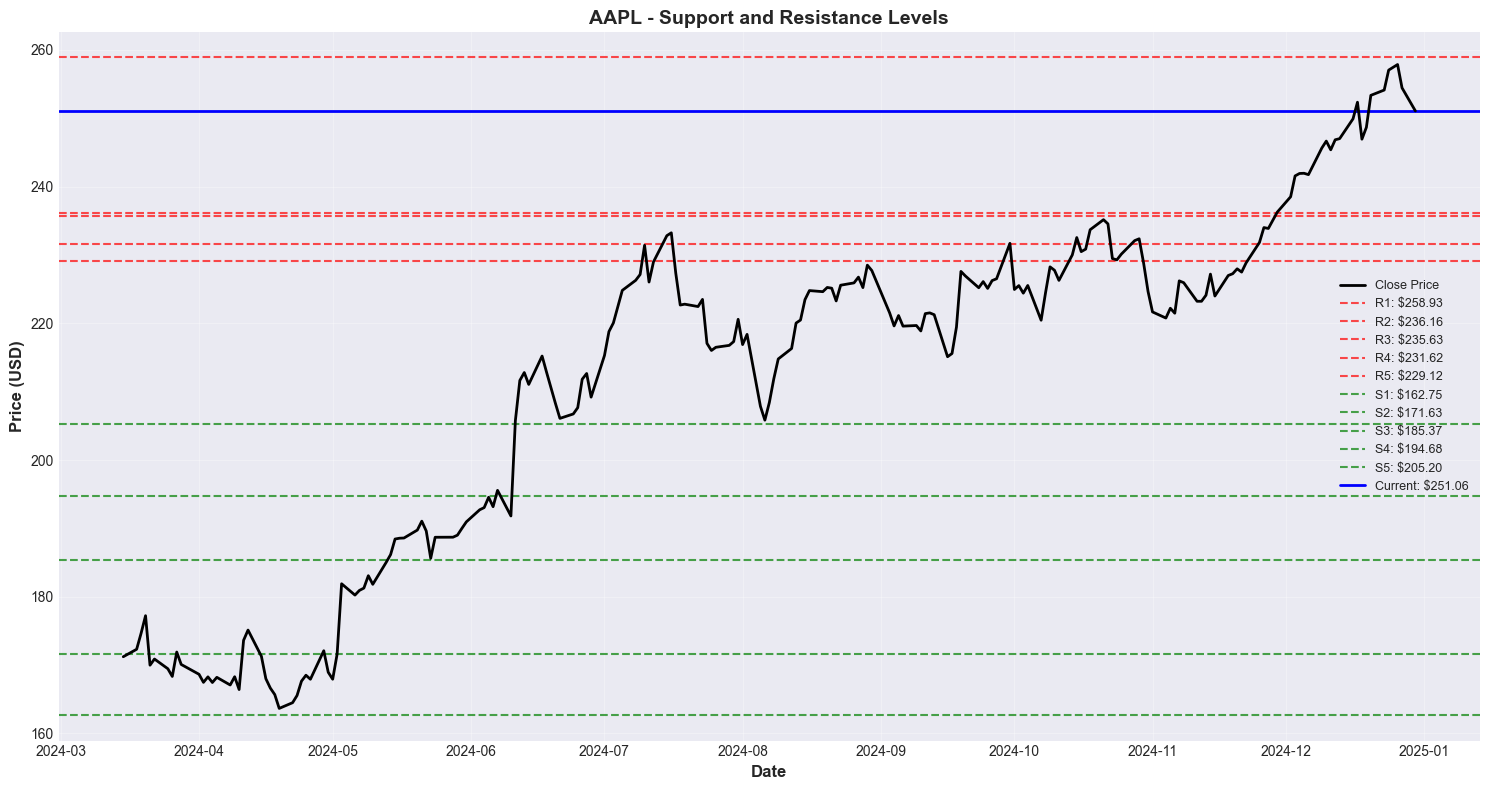


📚 Trading Strategy:
✅ BUY near Support levels
✅ SELL near Resistance levels
✅ BREAKOUT above Resistance = Strong buy signal
✅ BREAKDOWN below Support = Strong sell signal


In [17]:
# Visualisasi Support & Resistance
fig, ax = plt.subplots(figsize=(15, 8))

# Plot price
ax.plot(df_recent.index, df_recent['Close'], linewidth=2, color='black', label='Close Price', zorder=3)

# Plot resistance levels
for i, level in enumerate(resistance_levels):
    ax.axhline(y=level, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label=f'R{i+1}: ${level:.2f}')

# Plot support levels
for i, level in enumerate(support_levels):
    ax.axhline(y=level, color='green', linestyle='--', linewidth=1.5, alpha=0.7, label=f'S{i+1}: ${level:.2f}')

# Highlight current price
ax.axhline(y=current_price, color='blue', linestyle='-', linewidth=2, label=f'Current: ${current_price:.2f}')

ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Price (USD)', fontsize=12, fontweight='bold')
ax.set_title(f'{ticker} - Support and Resistance Levels', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=9)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📚 Trading Strategy:")
print("✅ BUY near Support levels")
print("✅ SELL near Resistance levels")
print("✅ BREAKOUT above Resistance = Strong buy signal")
print("✅ BREAKDOWN below Support = Strong sell signal")

<a id="12"></a>
## 11. Trading Strategy Implementation

Sekarang kita akan mengimplementasikan strategi trading berdasarkan indikator yang sudah kita pelajari.

### Strategi: Multi-Indicator Momentum Strategy

**Entry Rules (BUY):**
1. RSI < 40 (Not oversold but getting there)
2. MACD crosses above Signal line
3. Price above SMA 20
4. Volume > Average Volume

**Exit Rules (SELL):**
1. RSI > 60 atau
2. MACD crosses below Signal line atau
3. Price falls below SMA 20 atau
4. Stop Loss hit (2%) atau Take Profit hit (4%)

In [18]:
# Generate Trading Signals
def generate_signals(data):
    """Generate buy/sell signals based on multiple indicators"""
    
    signals = pd.DataFrame(index=data.index)
    signals['Price'] = data['Close']
    signals['Signal'] = 0
    
    # Buy signal conditions
    buy_condition = (
        (data['RSI'] < 45) &  # Not too oversold
        (data['MACD'] > data['MACD_Signal']) &  # MACD bullish
        (data['Close'] > data['SMA_20']) &  # Price above SMA20
        (data['Volume'] > data['Volume_MA'])  # High volume
    )
    
    # Sell signal conditions
    sell_condition = (
        (data['RSI'] > 65) |  # Getting overbought
        (data['MACD'] < data['MACD_Signal'])  # MACD bearish
    )
    
    signals.loc[buy_condition, 'Signal'] = 1  # Buy
    signals.loc[sell_condition, 'Signal'] = -1  # Sell
    
    return signals

# Generate signals
signals = generate_signals(df)

# Count signals
buy_signals = (signals['Signal'] == 1).sum()
sell_signals = (signals['Signal'] == -1).sum()

print("✅ Trading signals generated!")
print(f"\n📊 Signal Summary:")
print(f"Buy signals: {buy_signals}")
print(f"Sell signals: {sell_signals}")
print(f"Total days analyzed: {len(signals)}")

# Show recent signals
recent_buy = signals[signals['Signal'] == 1].tail(5)
recent_sell = signals[signals['Signal'] == -1].tail(5)

if len(recent_buy) > 0:
    print(f"\n🟢 Most Recent BUY Signals:")
    print(recent_buy[['Price', 'Signal']])

if len(recent_sell) > 0:
    print(f"\n🔴 Most Recent SELL Signals:")
    print(recent_sell[['Price', 'Signal']])

✅ Trading signals generated!

📊 Signal Summary:
Buy signals: 1
Sell signals: 384
Total days analyzed: 501

🟢 Most Recent BUY Signals:
            Price  Signal
Date                     
2024-05-02 171.63       1

🔴 Most Recent SELL Signals:
            Price  Signal
Date                     
2024-12-23 254.12      -1
2024-12-24 257.04      -1
2024-12-26 257.85      -1
2024-12-27 254.44      -1
2024-12-30 251.06      -1


<a id="13"></a>
## 12. Backtesting Strategy

Backtesting adalah proses menguji strategi trading pada data historis untuk mengevaluasi performanya.

### Metrics yang akan dihitung:
- **Total Return:** Keuntungan/kerugian total
- **Win Rate:** Persentase trade yang profitable
- **Average Win/Loss:** Rata-rata profit dan loss
- **Profit Factor:** Total profit / Total loss
- **Maximum Drawdown:** Kerugian maksimum dari peak
- **Sharpe Ratio:** Risk-adjusted return

In [19]:
# Backtest the strategy
def backtest_strategy(data, signals, initial_capital=10000, stop_loss_pct=0.02, take_profit_pct=0.04):
    """
    Backtest trading strategy with position management
    """
    
    capital = initial_capital
    position = 0  # 0 = no position, 1 = long position
    entry_price = 0
    trades = []
    equity_curve = []
    
    for i in range(len(data)):
        date = data.index[i]
        price = data['Close'].iloc[i]
        signal = signals['Signal'].iloc[i]
        
        # Record equity
        if position == 0:
            equity = capital
        else:
            equity = capital + (price - entry_price) / entry_price * capital
        equity_curve.append(equity)
        
        # Check stop loss and take profit
        if position == 1:
            pnl_pct = (price - entry_price) / entry_price
            
            # Stop loss hit
            if pnl_pct <= -stop_loss_pct:
                pnl = capital * pnl_pct
                capital += pnl
                trades.append({
                    'Entry Date': entry_date,
                    'Exit Date': date,
                    'Entry Price': entry_price,
                    'Exit Price': price,
                    'PnL': pnl,
                    'PnL %': pnl_pct * 100,
                    'Exit Reason': 'Stop Loss'
                })
                position = 0
                continue
            
            # Take profit hit
            if pnl_pct >= take_profit_pct:
                pnl = capital * pnl_pct
                capital += pnl
                trades.append({
                    'Entry Date': entry_date,
                    'Exit Date': date,
                    'Entry Price': entry_price,
                    'Exit Price': price,
                    'PnL': pnl,
                    'PnL %': pnl_pct * 100,
                    'Exit Reason': 'Take Profit'
                })
                position = 0
                continue
        
        # Entry signal
        if signal == 1 and position == 0:
            position = 1
            entry_price = price
            entry_date = date
        
        # Exit signal
        elif signal == -1 and position == 1:
            pnl_pct = (price - entry_price) / entry_price
            pnl = capital * pnl_pct
            capital += pnl
            trades.append({
                'Entry Date': entry_date,
                'Exit Date': date,
                'Entry Price': entry_price,
                'Exit Price': price,
                'PnL': pnl,
                'PnL %': pnl_pct * 100,
                'Exit Reason': 'Signal'
            })
            position = 0
    
    # Close any open position at the end
    if position == 1:
        price = data['Close'].iloc[-1]
        pnl_pct = (price - entry_price) / entry_price
        pnl = capital * pnl_pct
        capital += pnl
        trades.append({
            'Entry Date': entry_date,
            'Exit Date': data.index[-1],
            'Entry Price': entry_price,
            'Exit Price': price,
            'PnL': pnl,
            'PnL %': pnl_pct * 100,
            'Exit Reason': 'End of Period'
        })
    
    return pd.DataFrame(trades), equity_curve, capital

# Run backtest
initial_capital = 10000
trades_df, equity_curve, final_capital = backtest_strategy(df, signals, initial_capital)

print("✅ Backtest completed!")
print(f"\n💰 BACKTEST RESULTS:")
print(f"{'='*50}")
print(f"Initial Capital:  ${initial_capital:,.2f}")
print(f"Final Capital:    ${final_capital:,.2f}")
print(f"Total Return:     ${final_capital - initial_capital:,.2f}")
print(f"Return %:         {(final_capital / initial_capital - 1) * 100:.2f}%")
print(f"Number of Trades: {len(trades_df)}")

✅ Backtest completed!

💰 BACKTEST RESULTS:
Initial Capital:  $10,000.00
Final Capital:    $10,598.16
Total Return:     $598.16
Return %:         5.98%
Number of Trades: 1


In [20]:
# Calculate detailed performance metrics
if len(trades_df) > 0:
    # Win/Loss statistics
    winning_trades = trades_df[trades_df['PnL'] > 0]
    losing_trades = trades_df[trades_df['PnL'] < 0]
    
    win_rate = len(winning_trades) / len(trades_df) * 100
    avg_win = winning_trades['PnL %'].mean() if len(winning_trades) > 0 else 0
    avg_loss = losing_trades['PnL %'].mean() if len(losing_trades) > 0 else 0
    
    total_profit = winning_trades['PnL'].sum() if len(winning_trades) > 0 else 0
    total_loss = abs(losing_trades['PnL'].sum()) if len(losing_trades) > 0 else 0
    profit_factor = total_profit / total_loss if total_loss > 0 else float('inf')
    
    # Maximum drawdown
    equity_series = pd.Series(equity_curve)
    running_max = equity_series.cummax()
    drawdown = (equity_series - running_max) / running_max * 100
    max_drawdown = drawdown.min()
    
    # Sharpe ratio (simplified)
    returns = trades_df['PnL %'].values
    sharpe_ratio = np.mean(returns) / np.std(returns) if np.std(returns) > 0 else 0
    
    print(f"\n📊 DETAILED METRICS:")
    print(f"{'='*50}")
    print(f"Win Rate:          {win_rate:.2f}%")
    print(f"Winning Trades:    {len(winning_trades)}")
    print(f"Losing Trades:     {len(losing_trades)}")
    print(f"Average Win:       {avg_win:.2f}%")
    print(f"Average Loss:      {avg_loss:.2f}%")
    print(f"Profit Factor:     {profit_factor:.2f}")
    print(f"Max Drawdown:      {max_drawdown:.2f}%")
    print(f"Sharpe Ratio:      {sharpe_ratio:.2f}")
    
    print(f"\n📋 TOP 5 BEST TRADES:")
    print(trades_df.nlargest(5, 'PnL')[['Entry Date', 'Exit Date', 'PnL %', 'Exit Reason']])
    
    print(f"\n📋 TOP 5 WORST TRADES:")
    print(trades_df.nsmallest(5, 'PnL')[['Entry Date', 'Exit Date', 'PnL %', 'Exit Reason']])
    
else:
    print("\n⚠️ No trades executed in this period")


📊 DETAILED METRICS:
Win Rate:          100.00%
Winning Trades:    1
Losing Trades:     0
Average Win:       5.98%
Average Loss:      0.00%
Profit Factor:     inf
Max Drawdown:      0.00%
Sharpe Ratio:      0.00

📋 TOP 5 BEST TRADES:
  Entry Date  Exit Date  PnL %  Exit Reason
0 2024-05-02 2024-05-03   5.98  Take Profit

📋 TOP 5 WORST TRADES:
  Entry Date  Exit Date  PnL %  Exit Reason
0 2024-05-02 2024-05-03   5.98  Take Profit


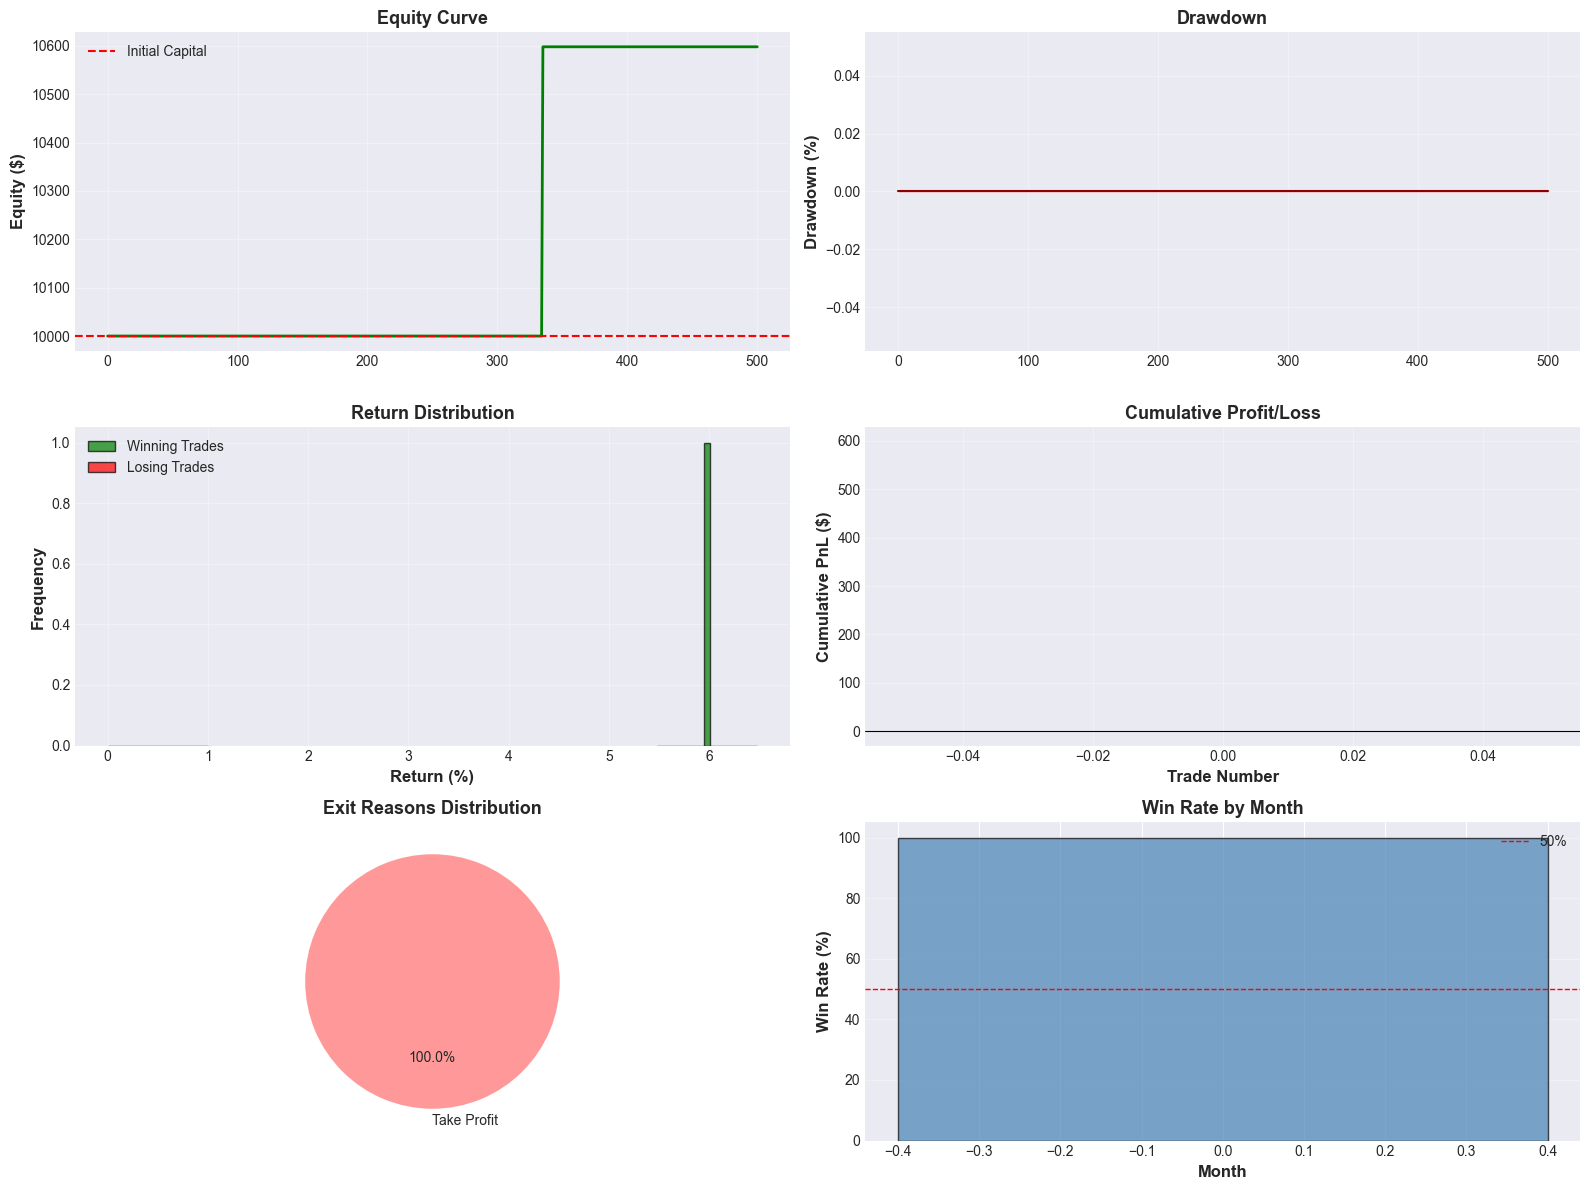


✅ Backtest visualization complete!


In [21]:
# Visualize backtest results
if len(trades_df) > 0:
    fig, axes = plt.subplots(3, 2, figsize=(16, 12))
    
    # Plot 1: Equity Curve
    axes[0, 0].plot(equity_curve, linewidth=2, color='green')
    axes[0, 0].axhline(y=initial_capital, color='red', linestyle='--', label='Initial Capital')
    axes[0, 0].set_ylabel('Equity ($)', fontsize=12, fontweight='bold')
    axes[0, 0].set_title('Equity Curve', fontsize=13, fontweight='bold')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Plot 2: Drawdown
    equity_series = pd.Series(equity_curve)
    running_max = equity_series.cummax()
    drawdown = (equity_series - running_max) / running_max * 100
    axes[0, 1].fill_between(range(len(drawdown)), drawdown, 0, color='red', alpha=0.3)
    axes[0, 1].plot(drawdown, linewidth=1.5, color='darkred')
    axes[0, 1].set_ylabel('Drawdown (%)', fontsize=12, fontweight='bold')
    axes[0, 1].set_title('Drawdown', fontsize=13, fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Plot 3: Win/Loss Distribution
    axes[1, 0].hist(trades_df[trades_df['PnL'] > 0]['PnL %'], bins=15, alpha=0.7, 
                    color='green', label='Winning Trades', edgecolor='black')
    axes[1, 0].hist(trades_df[trades_df['PnL'] < 0]['PnL %'], bins=15, alpha=0.7, 
                    color='red', label='Losing Trades', edgecolor='black')
    axes[1, 0].set_xlabel('Return (%)', fontsize=12, fontweight='bold')
    axes[1, 0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
    axes[1, 0].set_title('Return Distribution', fontsize=13, fontweight='bold')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # Plot 4: Cumulative PnL
    trades_df['Cumulative_PnL'] = trades_df['PnL'].cumsum()
    axes[1, 1].plot(trades_df['Cumulative_PnL'].values, linewidth=2, color='blue')
    axes[1, 1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
    axes[1, 1].set_xlabel('Trade Number', fontsize=12, fontweight='bold')
    axes[1, 1].set_ylabel('Cumulative PnL ($)', fontsize=12, fontweight='bold')
    axes[1, 1].set_title('Cumulative Profit/Loss', fontsize=13, fontweight='bold')
    axes[1, 1].grid(True, alpha=0.3)
    
    # Plot 5: Exit Reasons
    exit_reasons = trades_df['Exit Reason'].value_counts()
    axes[2, 0].pie(exit_reasons.values, labels=exit_reasons.index, autopct='%1.1f%%',
                   colors=['#ff9999','#66b3ff','#99ff99'], startangle=90)
    axes[2, 0].set_title('Exit Reasons Distribution', fontsize=13, fontweight='bold')
    
    # Plot 6: Win Rate per Month
    trades_df['Month'] = pd.to_datetime(trades_df['Exit Date']).dt.to_period('M')
    monthly_stats = trades_df.groupby('Month').apply(
        lambda x: (x['PnL'] > 0).sum() / len(x) * 100
    )
    axes[2, 1].bar(range(len(monthly_stats)), monthly_stats.values, color='steelblue', 
                   edgecolor='black', alpha=0.7)
    axes[2, 1].axhline(y=50, color='red', linestyle='--', linewidth=1, label='50%')
    axes[2, 1].set_xlabel('Month', fontsize=12, fontweight='bold')
    axes[2, 1].set_ylabel('Win Rate (%)', fontsize=12, fontweight='bold')
    axes[2, 1].set_title('Win Rate by Month', fontsize=13, fontweight='bold')
    axes[2, 1].legend()
    axes[2, 1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    print("\n✅ Backtest visualization complete!")
else:
    print("⚠️ No trades to visualize")

<a id="14"></a>
## 13. Risk Management Calculator

Risk management adalah aspek PALING PENTING dalam day trading. Tanpa risk management yang baik, bahkan strategi terbaik pun akan gagal.

### Prinsip Risk Management:
1. **Never risk more than 1-2% per trade**
2. **Always use stop loss**
3. **Risk-Reward ratio minimum 1:2**
4. **Position sizing based on risk, not capital**
5. **Maximum daily loss limit (3-5%)**

In [22]:
# Risk Management Calculator
class RiskCalculator:
    def __init__(self, account_size, risk_per_trade_pct=1.0):
        self.account_size = account_size
        self.risk_per_trade_pct = risk_per_trade_pct
        
    def calculate_position_size(self, entry_price, stop_loss_price):
        """Calculate position size based on risk"""
        risk_per_share = abs(entry_price - stop_loss_price)
        risk_amount = self.account_size * (self.risk_per_trade_pct / 100)
        position_size = risk_amount / risk_per_share
        return position_size
    
    def calculate_risk_reward(self, entry_price, stop_loss_price, take_profit_price):
        """Calculate risk-reward ratio"""
        risk = abs(entry_price - stop_loss_price)
        reward = abs(take_profit_price - entry_price)
        return reward / risk if risk > 0 else 0
    
    def calculate_breakeven_winrate(self, risk_reward_ratio):
        """Calculate required win rate to break even"""
        return 1 / (1 + risk_reward_ratio)
    
    def simulate_trades(self, num_trades, win_rate, avg_win_pct, avg_loss_pct):
        """Simulate trading performance"""
        results = []
        capital = self.account_size
        
        for i in range(num_trades):
            if np.random.random() < win_rate:
                # Win
                profit = capital * (avg_win_pct / 100)
                capital += profit
                results.append({'Trade': i+1, 'Result': 'Win', 'PnL': profit, 'Capital': capital})
            else:
                # Loss
                loss = capital * (avg_loss_pct / 100)
                capital += loss  # loss is negative
                results.append({'Trade': i+1, 'Result': 'Loss', 'PnL': loss, 'Capital': capital})
        
        return pd.DataFrame(results), capital

# Example calculation
account_size = 50_000_000  # Rp 50 juta
risk_per_trade = 1.0  # 1% risk per trade

calculator = RiskCalculator(account_size, risk_per_trade)

# Example trade
entry_price = 1000
stop_loss = 970  # 3% stop loss
take_profit = 1060  # 6% take profit

position_size = calculator.calculate_position_size(entry_price, stop_loss)
risk_reward = calculator.calculate_risk_reward(entry_price, stop_loss, take_profit)
breakeven_wr = calculator.calculate_breakeven_winrate(risk_reward)

print("💰 RISK MANAGEMENT CALCULATOR")
print("="*60)
print(f"\nAccount Size:        Rp {account_size:,.0f}")
print(f"Risk per Trade:      {risk_per_trade}% = Rp {account_size * risk_per_trade / 100:,.0f}")
print(f"\nExample Trade:")
print(f"Entry Price:         Rp {entry_price:,.0f}")
print(f"Stop Loss:           Rp {stop_loss:,.0f} ({(stop_loss/entry_price-1)*100:.1f}%)")
print(f"Take Profit:         Rp {take_profit:,.0f} ({(take_profit/entry_price-1)*100:.1f}%)")
print(f"\nCalculated Position Size: {position_size:,.0f} shares")
print(f"Total Investment:         Rp {position_size * entry_price:,.0f}")
print(f"Risk-Reward Ratio:        1:{risk_reward:.2f}")
print(f"Breakeven Win Rate:       {breakeven_wr*100:.1f}%")
print(f"\nPotential Profit:   Rp {position_size * (take_profit - entry_price):,.0f}")
print(f"Potential Loss:     Rp {position_size * (stop_loss - entry_price):,.0f}")

💰 RISK MANAGEMENT CALCULATOR

Account Size:        Rp 50,000,000
Risk per Trade:      1.0% = Rp 500,000

Example Trade:
Entry Price:         Rp 1,000
Stop Loss:           Rp 970 (-3.0%)
Take Profit:         Rp 1,060 (6.0%)

Calculated Position Size: 16,667 shares
Total Investment:         Rp 16,666,667
Risk-Reward Ratio:        1:2.00
Breakeven Win Rate:       33.3%

Potential Profit:   Rp 1,000,000
Potential Loss:     Rp -500,000


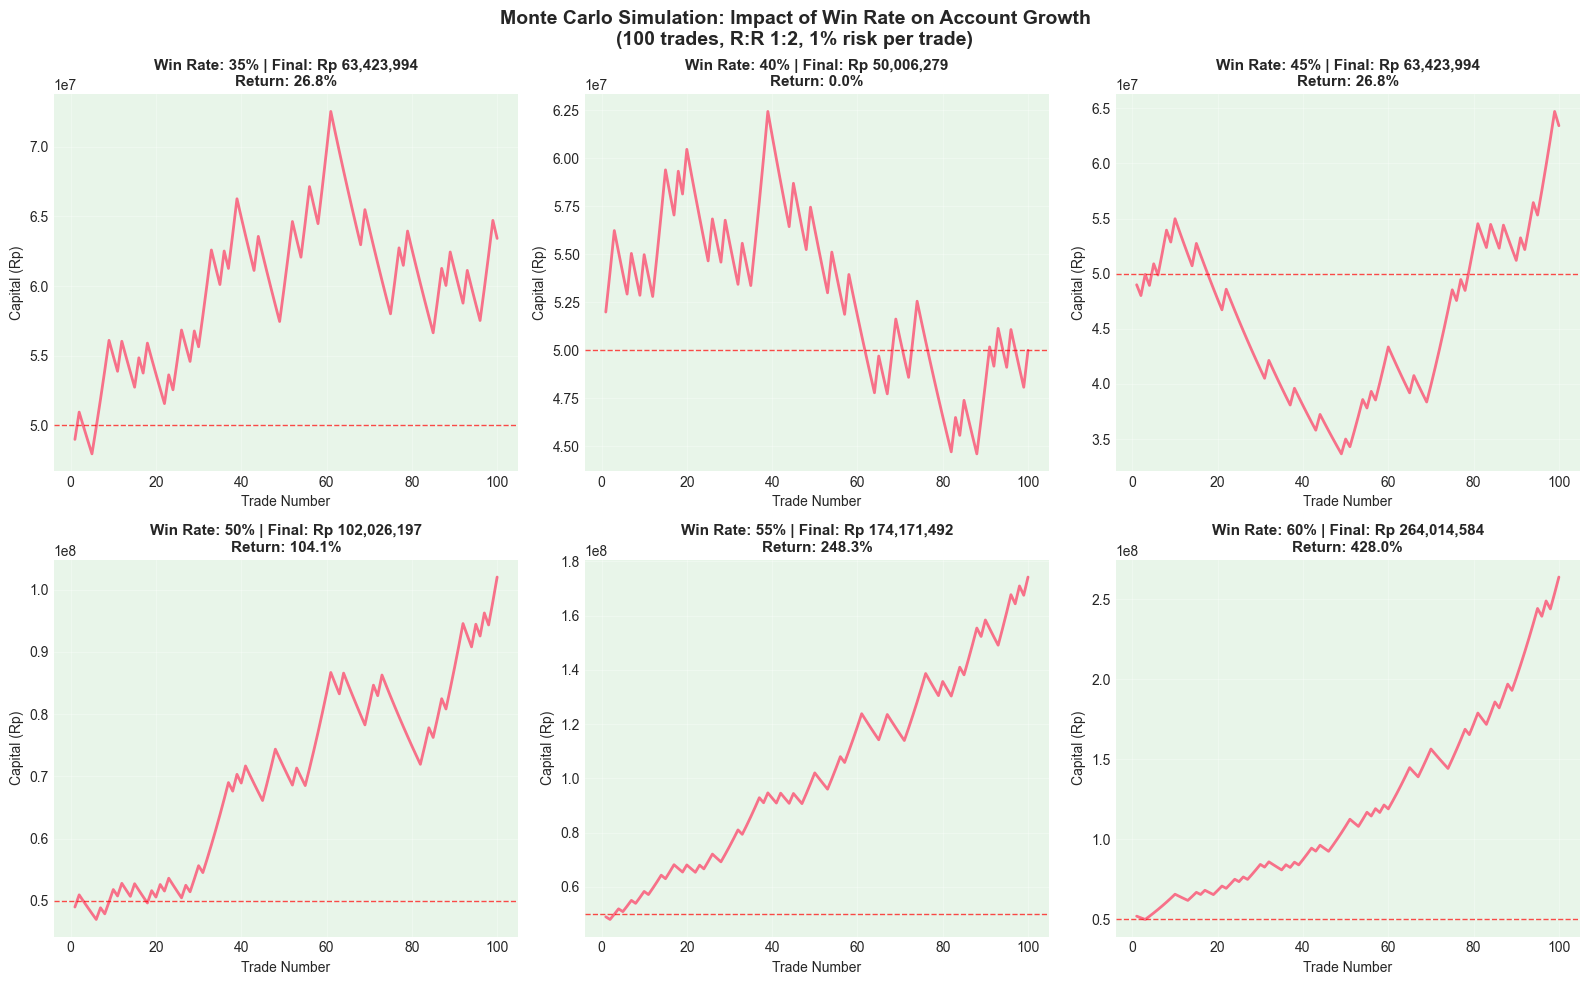


📊 Key Insights:
✅ Even with 40% win rate, you can be profitable with R:R > 1:2
✅ Higher win rate = more consistent growth
✅ Risk management is MORE important than win rate
✅ Protect capital first, profits will follow


In [23]:
# Simulate different win rates
win_rates = [0.35, 0.40, 0.45, 0.50, 0.55, 0.60]
num_trades = 100

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, wr in enumerate(win_rates):
    results_df, final_capital = calculator.simulate_trades(
        num_trades=num_trades,
        win_rate=wr,
        avg_win_pct=4.0,  # 4% average win
        avg_loss_pct=-2.0  # 2% average loss (R:R = 1:2)
    )
    
    # Plot equity curve
    axes[idx].plot(results_df['Trade'], results_df['Capital'], linewidth=2)
    axes[idx].axhline(y=account_size, color='red', linestyle='--', linewidth=1, alpha=0.7)
    axes[idx].set_title(f'Win Rate: {wr*100:.0f}% | Final: Rp {final_capital:,.0f}\nReturn: {(final_capital/account_size-1)*100:.1f}%', 
                       fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Trade Number')
    axes[idx].set_ylabel('Capital (Rp)')
    axes[idx].grid(True, alpha=0.3)
    
    # Color based on performance
    if final_capital > account_size:
        axes[idx].set_facecolor('#e8f5e9')  # Light green
    else:
        axes[idx].set_facecolor('#ffebee')  # Light red

plt.suptitle('Monte Carlo Simulation: Impact of Win Rate on Account Growth\n(100 trades, R:R 1:2, 1% risk per trade)', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📊 Key Insights:")
print("✅ Even with 40% win rate, you can be profitable with R:R > 1:2")
print("✅ Higher win rate = more consistent growth")
print("✅ Risk management is MORE important than win rate")
print("✅ Protect capital first, profits will follow")

<a id="15"></a>
## 14. Trading Journal Template

Trading journal adalah WAJIB untuk setiap trader. Ini membantu Anda:
- Track semua trades
- Identify patterns
- Learn from mistakes
- Improve strategy

Berikut adalah template trading journal yang bisa Anda gunakan:

In [24]:
# Trading Journal Template
trading_journal = pd.DataFrame({
    'Date': pd.date_range(start='2024-01-01', periods=10, freq='D'),
    'Ticker': ['AAPL', 'MSFT', 'GOOGL', 'AAPL', 'TSLA', 'AAPL', 'MSFT', 'NVDA', 'AAPL', 'META'],
    'Direction': ['Long', 'Long', 'Long', 'Short', 'Long', 'Long', 'Long', 'Long', 'Short', 'Long'],
    'Entry_Price': [150.0, 370.0, 140.0, 152.0, 245.0, 149.0, 372.0, 490.0, 153.0, 350.0],
    'Exit_Price': [154.5, 368.0, 143.0, 150.0, 250.0, 147.0, 376.0, 495.0, 151.0, 355.0],
    'Position_Size': [100, 50, 80, 100, 60, 100, 50, 40, 100, 60],
    'Stop_Loss': [147.0, 366.0, 137.0, 155.0, 240.0, 146.0, 368.0, 485.0, 156.0, 345.0],
    'Take_Profit': [156.0, 378.0, 147.0, 148.0, 255.0, 155.0, 380.0, 505.0, 149.0, 360.0],
    'Exit_Reason': ['TP', 'Signal', 'TP', 'TP', 'TP', 'SL', 'TP', 'TP', 'TP', 'TP'],
    'Emotion': ['Confident', 'Anxious', 'Confident', 'Calm', 'Excited', 'Frustrated', 'Confident', 'Calm', 'Confident', 'Confident'],
    'Notes': ['Perfect setup', 'Early exit', 'Good volume', 'Nice reversal', 'News catalyst', 
              'Should waited', 'Clean trade', 'Strong momentum', 'Good discipline', 'Patient entry']
})

# Calculate PnL
trading_journal['PnL'] = (trading_journal['Exit_Price'] - trading_journal['Entry_Price']) * trading_journal['Position_Size']
trading_journal['PnL_Pct'] = (trading_journal['Exit_Price'] / trading_journal['Entry_Price'] - 1) * 100

# Adjust for short positions
short_mask = trading_journal['Direction'] == 'Short'
trading_journal.loc[short_mask, 'PnL'] = -trading_journal.loc[short_mask, 'PnL']
trading_journal.loc[short_mask, 'PnL_Pct'] = -trading_journal.loc[short_mask, 'PnL_Pct']

print("📝 TRADING JOURNAL EXAMPLE")
print("="*80)
print(trading_journal[['Date', 'Ticker', 'Direction', 'Entry_Price', 'Exit_Price', 'PnL', 'PnL_Pct', 'Exit_Reason']])

# Summary statistics
total_trades = len(trading_journal)
winning_trades = (trading_journal['PnL'] > 0).sum()
losing_trades = (trading_journal['PnL'] < 0).sum()
win_rate = winning_trades / total_trades * 100
total_pnl = trading_journal['PnL'].sum()
avg_win = trading_journal[trading_journal['PnL'] > 0]['PnL_Pct'].mean()
avg_loss = trading_journal[trading_journal['PnL'] < 0]['PnL_Pct'].mean()

print(f"\n📊 JOURNAL SUMMARY:")
print(f"{'='*80}")
print(f"Total Trades:      {total_trades}")
print(f"Winning Trades:    {winning_trades}")
print(f"Losing Trades:     {losing_trades}")
print(f"Win Rate:          {win_rate:.1f}%")
print(f"Total PnL:         ${total_pnl:,.2f}")
print(f"Average Win:       {avg_win:.2f}%")
print(f"Average Loss:      {avg_loss:.2f}%")
print(f"\n💡 TIP: Review your journal weekly to identify patterns and improve!")

📝 TRADING JOURNAL EXAMPLE
        Date Ticker Direction  Entry_Price  Exit_Price     PnL  PnL_Pct  \
0 2024-01-01   AAPL      Long       150.00      154.50  450.00     3.00   
1 2024-01-02   MSFT      Long       370.00      368.00 -100.00    -0.54   
2 2024-01-03  GOOGL      Long       140.00      143.00  240.00     2.14   
3 2024-01-04   AAPL     Short       152.00      150.00  200.00     1.32   
4 2024-01-05   TSLA      Long       245.00      250.00  300.00     2.04   
5 2024-01-06   AAPL      Long       149.00      147.00 -200.00    -1.34   
6 2024-01-07   MSFT      Long       372.00      376.00  200.00     1.08   
7 2024-01-08   NVDA      Long       490.00      495.00  200.00     1.02   
8 2024-01-09   AAPL     Short       153.00      151.00  200.00     1.31   
9 2024-01-10   META      Long       350.00      355.00  300.00     1.43   

  Exit_Reason  
0          TP  
1      Signal  
2          TP  
3          TP  
4          TP  
5          SL  
6          TP  
7          TP  
8   

## 15. Kesimpulan dan Langkah Selanjutnya

### 🎯 Apa yang Sudah Kita Pelajari:

1. **Pengenalan Day Trading** - Konsep dasar dan perbedaan dengan investasi jangka panjang
2. **Data Collection** - Mengambil dan mengolah data market
3. **Candlestick Charts** - Membaca dan menginterpretasi candlestick patterns
4. **Technical Indicators:**
   - Moving Averages (SMA & EMA)
   - RSI (Relative Strength Index)
   - MACD (Moving Average Convergence Divergence)
   - Bollinger Bands
5. **Volume Analysis** - Mengkonfirmasi pergerakan harga
6. **Support & Resistance** - Identifikasi level kunci
7. **Trading Strategy** - Multi-indicator momentum strategy
8. **Backtesting** - Menguji strategi pada data historis
9. **Risk Management** - Position sizing dan risk-reward ratio
10. **Trading Journal** - Tracking dan evaluasi performance

---

### ⚠️ PERINGATAN PENTING:

1. **Day trading adalah HIGH RISK**
   - Mayoritas day trader mengalami kerugian
   - Butuh modal yang cukup (min Rp 10-50 juta)
   - Butuh waktu full-time

2. **Jangan trading dengan:**
   - Uang kebutuhan hidup
   - Uang pinjaman/hutang
   - Uang yang tidak siap hilang

3. **Mulai dengan Paper Trading**
   - Practice dulu min 3-6 bulan
   - Buktikan konsisten profitable
   - Baru gunakan real money dengan modal kecil

---

### 📚 Langkah Selanjutnya:

**Phase 1: Learning (1-3 bulan)**
- ✅ Baca buku tentang trading
- ✅ Watch YouTube tutorials
- ✅ Join komunitas trader
- ✅ Pelajari lebih dalam technical analysis

**Phase 2: Paper Trading (3-6 bulan)**
- ✅ Practice dengan virtual money
- ✅ Test berbagai strategi
- ✅ Keep trading journal
- ✅ Target: 3 bulan profitable berturut-turut

**Phase 3: Small Real Money (6-12 bulan)**
- ✅ Mulai dengan modal kecil (Rp 5-10 juta)
- ✅ Position size sangat kecil
- ✅ Focus pada discipline
- ✅ Scale up perlahan

**Phase 4: Full Capital (12+ bulan)**
- ✅ Proven track record
- ✅ Psychological capital built
- ✅ Full capital deployment
- ✅ Continuous improvement

---

### 🎓 Resources untuk Belajar Lebih Lanjut:

**Buku:**
- "Trading in the Zone" by Mark Douglas
- "Technical Analysis of Financial Markets" by John Murphy
- "Market Wizards" by Jack Schwager

**Websites:**
- TradingView.com
- Investopedia.com
- Stockbit.com (Indonesia)

**YouTube Channels:**
- The Trading Channel
- Warrior Trading
- Ross Cameron

---

### 💪 Mindset yang Harus Dimiliki:

1. **Patient** - Tunggu setup yang tepat
2. **Disciplined** - Follow plan tanpa emosi
3. **Humble** - Always learning
4. **Resilient** - Bangkit dari loss
5. **Rational** - Decisions based on data, not emotion

---

### 🚀 Remember:

> *"The goal of a successful trader is to make the best trades. Money is secondary."* - Alexander Elder

> *"Risk comes from not knowing what you're doing."* - Warren Buffett

> *"In trading, the race is won by the tortoise, not the hare."* - Unknown

---

**Selamat belajar dan good luck dalam trading journey Anda! 📈💰**

*Disclaimer: Tutorial ini hanya untuk edukasi. Trading saham mengandung risiko tinggi. Lakukan riset sendiri dan konsultasi dengan financial advisor sebelum trading.*

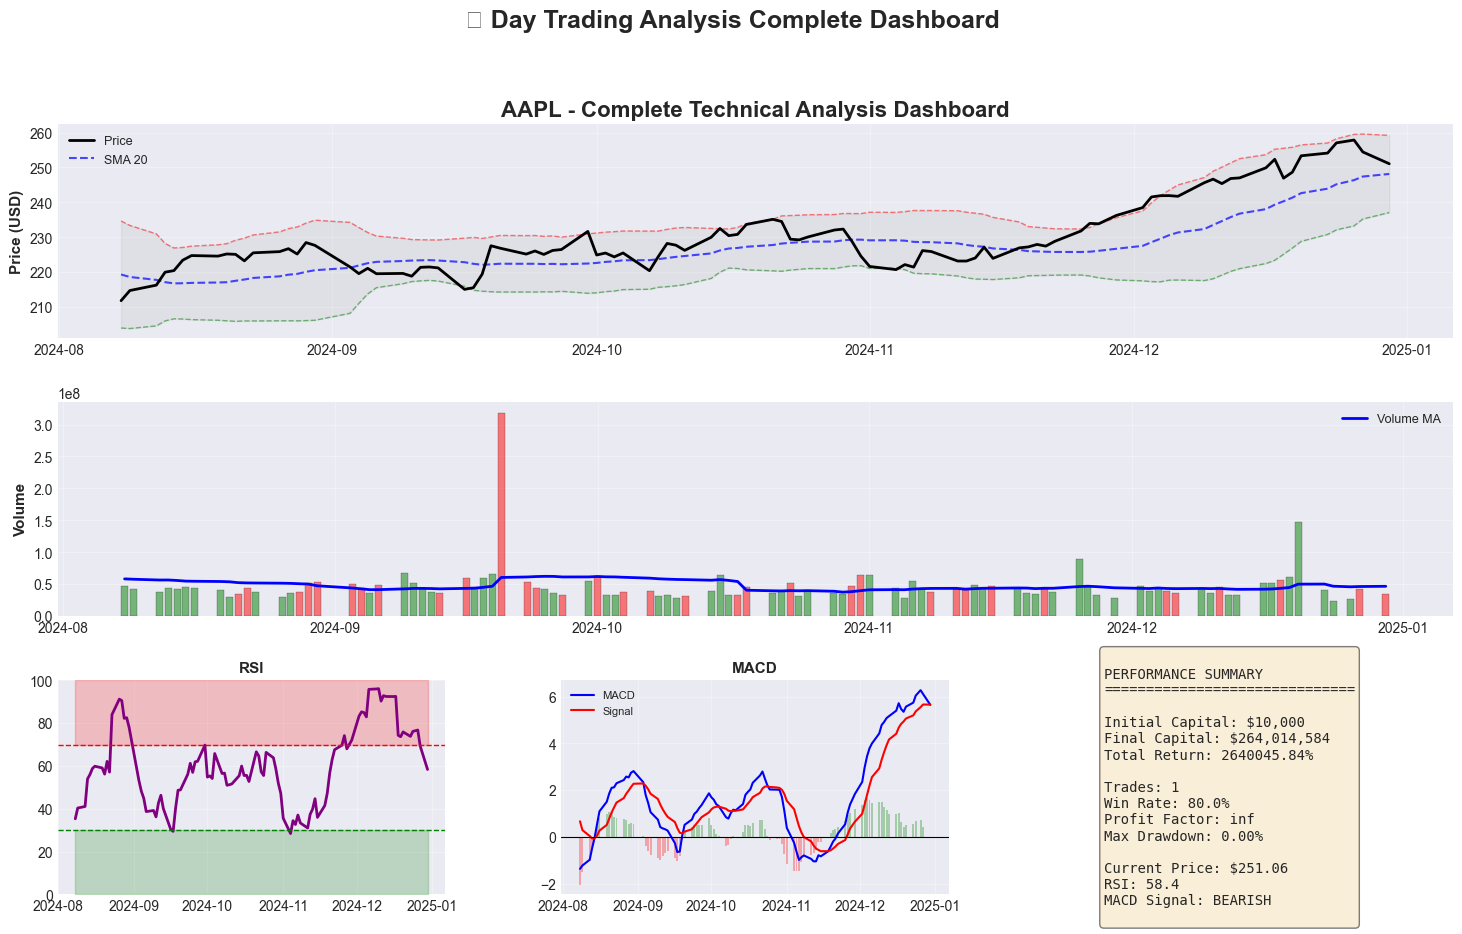


✅ TUTORIAL COMPLETE!

📚 You have learned:
  ✓ Technical indicators (MA, RSI, MACD, Bollinger Bands)
  ✓ Volume analysis
  ✓ Support & Resistance
  ✓ Trading strategy development
  ✓ Backtesting
  ✓ Risk management

🚀 Next steps:
  1. Practice with paper trading
  2. Keep a trading journal
  3. Refine your strategy
  4. Stay disciplined!

💪 Remember: Success in trading = Knowledge + Discipline + Patience


In [25]:
# Final visualization - Complete Dashboard
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

df_final = df.tail(100)

# 1. Price with all indicators
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(df_final.index, df_final['Close'], linewidth=2, color='black', label='Price', zorder=3)
ax1.plot(df_final.index, df_final['SMA_20'], linewidth=1.5, color='blue', linestyle='--', label='SMA 20', alpha=0.7)
ax1.plot(df_final.index, df_final['BB_Upper'], linewidth=1, color='red', linestyle='--', alpha=0.5)
ax1.plot(df_final.index, df_final['BB_Lower'], linewidth=1, color='green', linestyle='--', alpha=0.5)
ax1.fill_between(df_final.index, df_final['BB_Upper'], df_final['BB_Lower'], alpha=0.1, color='gray')
ax1.set_title(f'{ticker} - Complete Technical Analysis Dashboard', fontsize=16, fontweight='bold')
ax1.set_ylabel('Price (USD)', fontsize=11, fontweight='bold')
ax1.legend(loc='best', fontsize=9)
ax1.grid(True, alpha=0.3)

# 2. Volume
ax2 = fig.add_subplot(gs[1, :])
colors_vol = ['green' if df_final['Close'].iloc[i] >= df_final['Open'].iloc[i] else 'red' for i in range(len(df_final))]
ax2.bar(df_final.index, df_final['Volume'], color=colors_vol, alpha=0.5, edgecolor='black', linewidth=0.3)
ax2.plot(df_final.index, df_final['Volume_MA'], linewidth=2, color='blue', label='Volume MA')
ax2.set_ylabel('Volume', fontsize=11, fontweight='bold')
ax2.legend(loc='best', fontsize=9)
ax2.grid(True, alpha=0.3)

# 3. RSI
ax3 = fig.add_subplot(gs[2, 0])
ax3.plot(df_final.index, df_final['RSI'], linewidth=2, color='purple')
ax3.axhline(y=70, color='red', linestyle='--', linewidth=1)
ax3.axhline(y=30, color='green', linestyle='--', linewidth=1)
ax3.fill_between(df_final.index, 70, 100, alpha=0.2, color='red')
ax3.fill_between(df_final.index, 0, 30, alpha=0.2, color='green')
ax3.set_title('RSI', fontsize=11, fontweight='bold')
ax3.set_ylim(0, 100)
ax3.grid(True, alpha=0.3)

# 4. MACD
ax4 = fig.add_subplot(gs[2, 1])
ax4.plot(df_final.index, df_final['MACD'], linewidth=1.5, color='blue', label='MACD')
ax4.plot(df_final.index, df_final['MACD_Signal'], linewidth=1.5, color='red', label='Signal')
ax4.bar(df_final.index, df_final['MACD_Histogram'], 
       color=['green' if x > 0 else 'red' for x in df_final['MACD_Histogram']], alpha=0.3)
ax4.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax4.set_title('MACD', fontsize=11, fontweight='bold')
ax4.legend(loc='best', fontsize=8)
ax4.grid(True, alpha=0.3)

# 5. Performance Summary
ax5 = fig.add_subplot(gs[2, 2])
ax5.axis('off')

summary_text = f"""
PERFORMANCE SUMMARY
{'='*30}

Initial Capital: ${initial_capital:,.0f}
Final Capital: ${final_capital:,.0f}
Total Return: {(final_capital/initial_capital-1)*100:.2f}%

Trades: {len(trades_df) if len(trades_df) > 0 else 0}
Win Rate: {win_rate:.1f}% (if len(trades_df) > 0 else 'N/A')
Profit Factor: {profit_factor:.2f} (if len(trades_df) > 0 else 'N/A')

Current Price: ${df['Close'].iloc[-1]:.2f}
RSI: {df['RSI'].iloc[-1]:.1f}
"""

if len(trades_df) > 0:
    summary_text = f"""
PERFORMANCE SUMMARY
{'='*30}

Initial Capital: ${initial_capital:,.0f}
Final Capital: ${final_capital:,.0f}
Total Return: {(final_capital/initial_capital-1)*100:.2f}%

Trades: {len(trades_df)}
Win Rate: {win_rate:.1f}%
Profit Factor: {profit_factor:.2f}
Max Drawdown: {max_drawdown:.2f}%

Current Price: ${df['Close'].iloc[-1]:.2f}
RSI: {df['RSI'].iloc[-1]:.1f}
MACD Signal: {'BULLISH' if df['MACD'].iloc[-1] > df['MACD_Signal'].iloc[-1] else 'BEARISH'}
"""

ax5.text(0.1, 0.5, summary_text, fontsize=10, family='monospace',
        verticalalignment='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle('📊 Day Trading Analysis Complete Dashboard', fontsize=18, fontweight='bold', y=0.995)
plt.show()

print("\n" + "="*80)
print("✅ TUTORIAL COMPLETE!")
print("="*80)
print("\n📚 You have learned:")
print("  ✓ Technical indicators (MA, RSI, MACD, Bollinger Bands)")
print("  ✓ Volume analysis")
print("  ✓ Support & Resistance")
print("  ✓ Trading strategy development")
print("  ✓ Backtesting")
print("  ✓ Risk management")
print("\n🚀 Next steps:")
print("  1. Practice with paper trading")
print("  2. Keep a trading journal")
print("  3. Refine your strategy")
print("  4. Stay disciplined!")
print("\n💪 Remember: Success in trading = Knowledge + Discipline + Patience")
print("="*80)